# Imersão Dados - Alura

## Precificando imóveis

### Aula 1

In [1]:
import pandas as pd
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)
import warnings
warnings.filterwarnings("ignore")

In [2]:
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [3]:
dados.sample(2)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
340,"Rua Bernardino de Campos, 816",Campo Belo,São Paulo,320,3,5,2,R$ 1.740.000
9600,"Rua Xiririca, 000",Vila Carrão,São Paulo,160,3,4,2,R$ 640.000


In [4]:
dados['Bairro'][6522]

'Vila Paulo Silas'

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [6]:
dados['Metragem'].mean()

442.30065947242207

In [7]:
sum((dados['Bairro'] == "Vila Mariana"))

184

In [8]:
tem_imoveis_vila_mariana = (dados['Bairro'] == "Vila Mariana")

In [9]:
dados.query('Bairro == "Vila Mariana"')['Metragem'].mean()

233.6195652173913

In [10]:
imoveis_vila_mariana = dados[tem_imoveis_vila_mariana]
imoveis_vila_mariana.head(3)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000


In [11]:
imoveis_vila_mariana['Metragem'].mean()

233.6195652173913

In [12]:
dados['Bairro'].value_counts()

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

<AxesSubplot: >

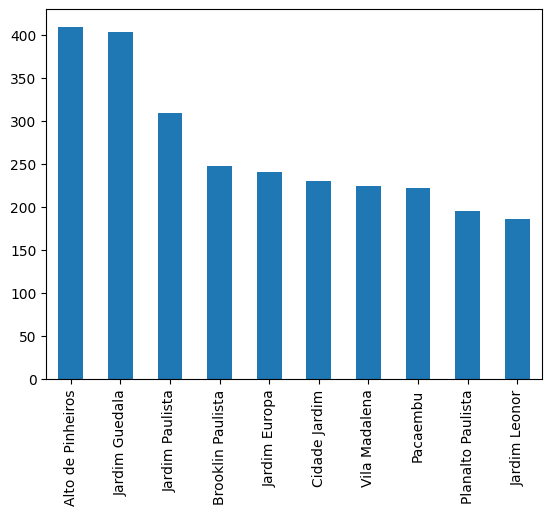

In [13]:
n_imoveis_bairros = dados['Bairro'].value_counts()
n_imoveis_bairros.head(10).plot.bar()

#### Desafios (aula 1):
1- Média metragem por bairro;

2- 2 formas de selecionar os dados por bairro (consultar os metodos na documentação dos pandas);

3- Explorar alguns gráficos na documentação, aplicar nas demais variáveis e realizar inshigts dos gráficos;

4- Pegar mediana, minimo, maximo e analisar;

5- Identificar quais são os bairros que não tem nome de Rua.

##### 1 - Resposta

In [14]:
bairros_metragem = dados.groupby('Bairro')['Metragem'].mean().reset_index().rename(columns={'Metragem': 'Mean_Metragem'})
bairros_metragem

,Bairro,Mean_Metragem
0,Aclimação,253.056818
1,Alto da Boa Vista,418.875000
2,Alto da Lapa,294.337209
3,Alto da Mooca,270.050000
4,Alto de Pinheiros,433.444988
...,...,...
696,Vila Água Funda,152.200000
697,Água Branca,191.000000
698,Água Fria,165.416667
699,Água Funda,139.000000


In [15]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


##### 2 Resposta

In [16]:
dados.query('Bairro == "Vila Mariana"')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


##### 3 Resposta

In [17]:
bairros_banheiros = dados.groupby('Bairro')['Banheiros'].mean().reset_index()
bairros_banheiros

,Bairro,Banheiros
0,Aclimação,3.079545
1,Alto da Boa Vista,5.125000
2,Alto da Lapa,3.790698
3,Alto da Mooca,2.600000
4,Alto de Pinheiros,4.838631
...,...,...
696,Vila Água Funda,2.200000
697,Água Branca,3.076923
698,Água Fria,3.416667
699,Água Funda,2.500000


<AxesSubplot: >

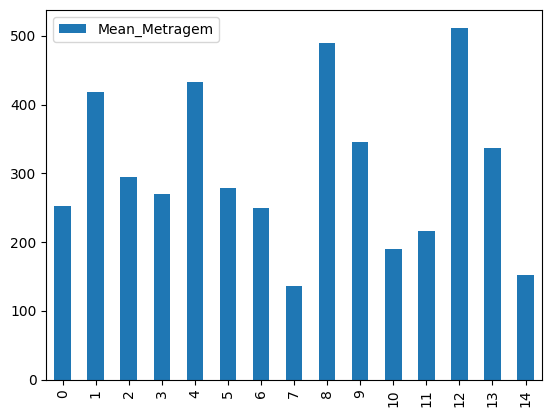

In [18]:
bairros_metragem.head(15).plot.bar()

<AxesSubplot: ylabel='Frequency'>

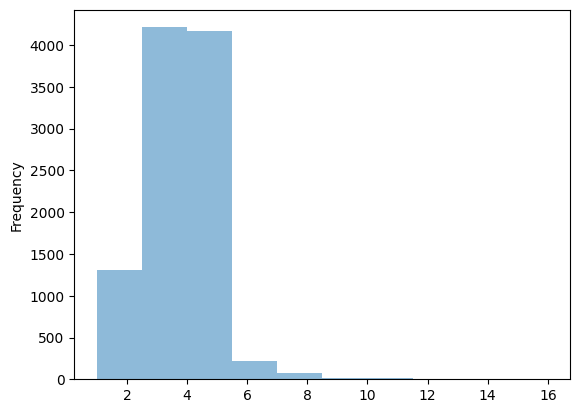

In [19]:
dados['Quartos'].plot.hist(bins = 10, alpha = 0.5)

<AxesSubplot: ylabel='Frequency'>

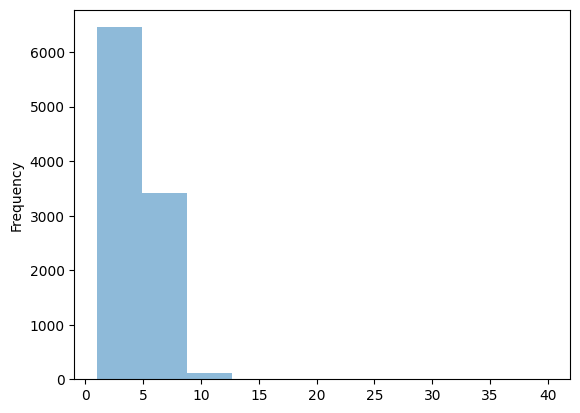

In [20]:
dados['Banheiros'].plot.hist(bins = 10, alpha = 0.5)

#### 4 - Resposta

In [21]:
dados.head(1)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000


In [22]:
dados.describe()

,Metragem,Quartos,Banheiros,Vagas
count,10008.000000,10008.000000,10008.000000,10008.000000
mean,442.300659,3.483114,3.879097,4.097222
std,7515.379389,1.064200,1.988467,2.824014
min,10.000000,1.000000,1.000000,1.000000
25%,173.000000,3.000000,2.000000,2.000000
50%,290.000000,3.000000,4.000000,4.000000
75%,460.250000,4.000000,5.000000,5.000000
max,750000.000000,16.000000,40.000000,50.000000


##### Análisando os dados a cima
- A princicpio podemos ver que existem grandes descrepancias entre as diversas residencias estudadas, chamando atenção alguns dados(outliers) que podem ser erros de digitação como residencia possuindo 750000 (750 mil) metros, as casas possuirem no maximo 16 quartos e terem 40 banheiros, sendo que se puxarmos os ddaos das residencias com 40 casas (existem 2) ambas possuem menos de 500 metros quadrados, explicitando um possível erro nesse campo. Podemos observar que o tamanho médio das casas ficam perto dos 400 metros quadrados dado que possivelmente foi alterado pela casa de 750 mil, evidenciado pela media de 290 metros quadrados para a metragem das casas de São Paulo

#### 5 - Resposta

In [23]:
rua_nula = dados['Rua'].isna()
bairros_ruas_nulas=dados[rua_nula]['Bairro']
bairros_ruas_nulas_df = pd.DataFrame(bairros_ruas_nulas)
bairros_ruas_nulas_df.value_counts('Bairro')

Bairro
Jardim Guedala          190
Alto de Pinheiros       169
Jardim Paulista         138
Jardim Europa           128
Jardim Leonor           118
                       ... 
Jardim Santo Elias        1
Jardim Sul São Paulo      1
Vila Darli                1
Vila Curuçá               1
Vila Macedópolis          1
Length: 394, dtype: int64

### Aula 2

In [24]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [25]:
dados['Valor'][0]

'R$ 7.000.000'

In [26]:
dados['Valor'][0].split()

['R$', '7.000.000']

In [27]:
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
286,NaN,Vila Matilde,São Paulo,120,3,2,1,R$ 530.000
2547,NaN,Jardim Paulista,São Paulo,231,2,2,2,R$ 4.570.000
3538,Rua das Jabuticabeiras,Cidade Jardim,São Paulo,460,3,3,4,R$ 4.500.000
8329,"Rua Parque da Fonte, 0",Barro Branco (Zona Norte),São Paulo,600,4,6,8,R$ 3.780.000
470,"Rua Marco Aurélio, 1381",Vila Romana,São Paulo,270,3,2,1,R$ 950.000
1184,Rua Aperca,Boaçava,São Paulo,949,5,6,6,R$ 8.000.000
3766,NaN,Chácara Santo Antônio (Zona Sul),São Paulo,132,3,3,3,R$ 1.100.000
1917,Rua Armando Pinto,Sumarezinho,São Paulo,259,3,4,2,R$ 2.300.000
5835,Rua Doutor Mário Vicente,Vila Dom Pedro I,São Paulo,180,3,4,4,R$ 1.200.000
1694,Rua Sanharó,Jardim Guedala,São Paulo,805,4,8,6,R$ 5.890.000


In [28]:
dados[['Moeda','Valor_anuncio','Tipo_anuncio']] =dados['Valor'].str.split(expand = True)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [29]:
dados[dados['Tipo_anuncio'].isnull()]['Tipo_anuncio'].unique()

array([None], dtype=object)

##### O dataset abaixo dados_vendas foi criado com intuito de retirar os imóveis que possuiam valores relacionados a aluguel e não valor de venda do imóvel

In [30]:
dados_vendas = dados[dados['Tipo_anuncio'].isnull()]
dados_vendas.reset_index(drop = True)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
9151,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
9152,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
9153,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
9154,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


In [31]:
dados_vendas['Valor_anuncio'] = dados_vendas['Valor_anuncio'].str.replace(".","",regex= True).astype(float)

In [32]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rua            6107 non-null   object 
 1   Bairro         9146 non-null   object 
 2   Cidade         9156 non-null   object 
 3   Metragem       9156 non-null   int64  
 4   Quartos        9156 non-null   int64  
 5   Banheiros      9156 non-null   int64  
 6   Vagas          9156 non-null   int64  
 7   Valor          9156 non-null   object 
 8   Moeda          9156 non-null   object 
 9   Valor_anuncio  9156 non-null   float64
 10  Tipo_anuncio   0 non-null      object 
dtypes: float64(1), int64(4), object(6)
memory usage: 858.4+ KB


<AxesSubplot: ylabel='Frequency'>

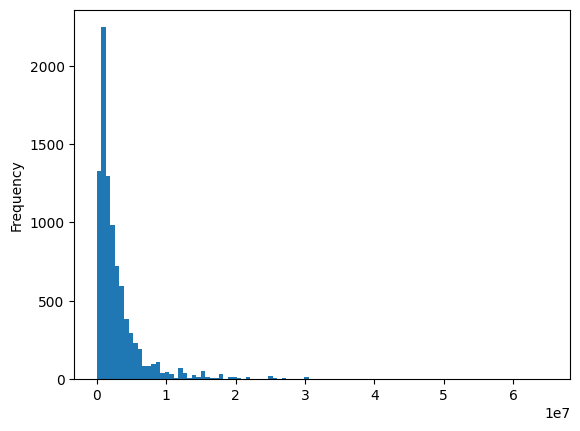

In [33]:
dados_vendas['Valor_anuncio'].plot.hist(bins = 100)



In [34]:
pd.set_option('display.precision', 2)
pd.set_option('display.float_format',lambda x: '%0.2f'% x)
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


In [35]:
dados_vendas[['Rua','Bairro','Cidade']].describe()

,Rua,Bairro,Cidade
count,6107,9146,9156
unique,3006,697,1
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo
freq,24,369,9156


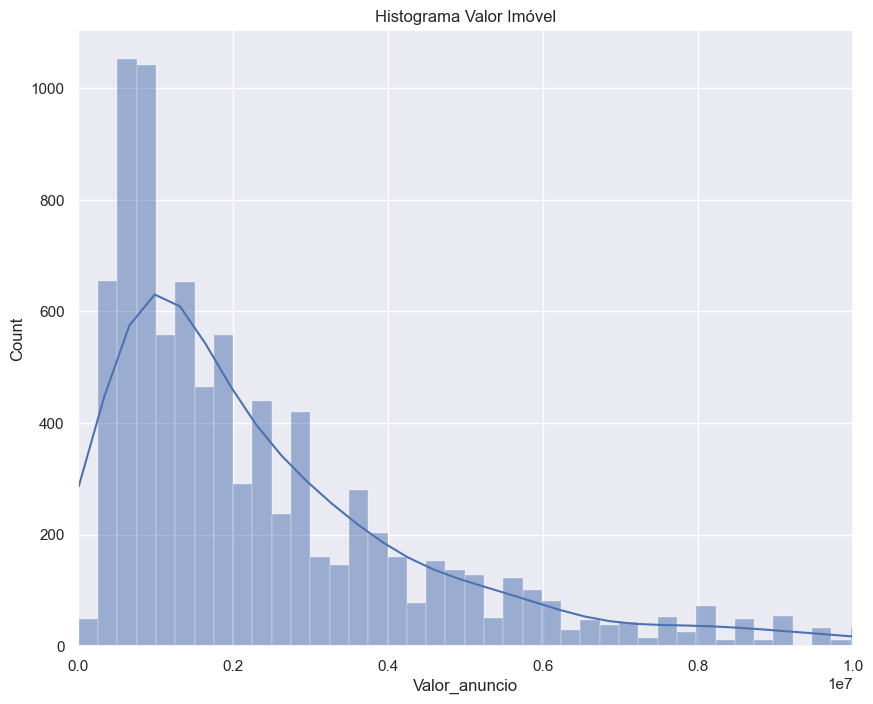

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.figure(figsize=(10, 8))
ax = sns.histplot(data = dados_vendas, x = "Valor_anuncio", kde = True)
ax.set_title("Histograma Valor Imóvel")
plt.xlim((-50, 10000000))
plt.show()

##### Desafio Aula 2 
1 - Criar uma escala de valor em milhões

2 - Ajustar o eixo X em valores em reais e legível, ajustar o design, alterar as labels,ajustar escala e limpar outliers

3 - Preço do m2 por bairro, plotar os resultados

4 - Explorar as biblotecas de vizualiações e colocar suas conclusões

5 - Pesquisar uma vizualiação para analisar os quartis, media e outliers(boxplot)

Utilizar o galeritas

In [37]:
dados_vendas.loc[:, 'Valor_anuncio_Milhoes'] =(dados_vendas['Valor_anuncio'] / 1000000)

In [38]:
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_Milhoes
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.00,None,7.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.00,None,3.70
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.00,None,0.38
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.00,None,0.69
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.00,None,0.54
...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1500000.00,None,1.50
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665000.00,None,0.67
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2300000.00,None,2.30
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1050000.00,None,1.05


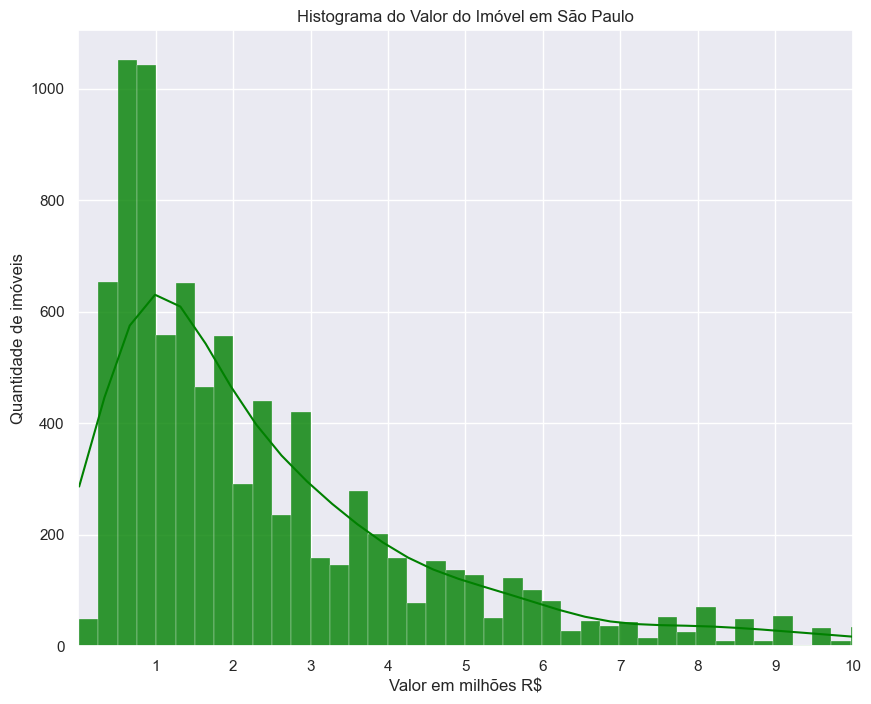

In [39]:
sns.set()
plt.figure(figsize=(10,8))
ax = sns.histplot(data=dados_vendas, x='Valor_anuncio_Milhoes',kde=True, color = 'Green', alpha = 0.8)
ax.set_title('Histograma do Valor do Imóvel em São Paulo')
sns.set_style("whitegrid")
plt.xlim((-0.005,10))
plt.xlabel('Valor em milhões R$')
plt.ylabel('Quantidade de imóveis')
plt.xticks(range(1,11))
plt.show()

In [40]:
dados_vendas.loc[:, 'Preço_do_m2'] = dados_vendas['Valor_anuncio'] / dados_vendas['Metragem']
df_metro_quadrado = pd.DataFrame(dados_vendas.groupby('Bairro')['Preço_do_m2'].mean())


In [41]:
dados_bairro= dados_vendas.groupby("Bairro").sum()
dados_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_anuncio_Milhoes,Preço_do_m2
Bairro,,,,,,,
Aclimação,19447,258,240,230,139292801.00,139.29,604837.39
Alto da Boa Vista,3351,33,41,37,19130000.00,19.13,46796.55
Alto da Lapa,23940,252,308,320,166653500.00,166.65,608538.25
Alto da Mooca,5401,66,52,73,23683400.00,23.68,113834.80
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,1764.82,4158622.61
...,...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3260000.00,3.26,22335.64
Água Branca,2083,37,39,27,14718000.00,14.72,87229.37
Água Fria,1985,34,41,30,11125000.00,11.12,70093.25


In [42]:
dados_bairro["Preço_do_m2"] = dados_bairro["Valor_anuncio"]/dados_bairro["Metragem"]
dados_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_anuncio_Milhoes,Preço_do_m2
Bairro,,,,,,,
Aclimação,19447,258,240,230,139292801.00,139.29,7162.69
Alto da Boa Vista,3351,33,41,37,19130000.00,19.13,5708.74
Alto da Lapa,23940,252,308,320,166653500.00,166.65,6961.30
Alto da Mooca,5401,66,52,73,23683400.00,23.68,4385.00
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,1764.82,11126.34
...,...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3260000.00,3.26,4283.84
Água Branca,2083,37,39,27,14718000.00,14.72,7065.77
Água Fria,1985,34,41,30,11125000.00,11.12,5604.53


In [43]:
top_bairros = dados_vendas["Bairro"].value_counts()[:10].index
top_bairros

Index(['Alto de Pinheiros', 'Jardim Guedala', 'Jardim Paulista',
       'Brooklin Paulista', 'Jardim Europa', 'Pacaembu', 'Vila Madalena',
       'Cidade Jardim', 'Planalto Paulista', 'Jardim Leonor'],
      dtype='object')

In [44]:
dados_bairro.reset_index(inplace = True)
dados_bairro

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_anuncio_Milhoes,Preço_do_m2
0,Aclimação,19447,258,240,230,139292801.00,139.29,7162.69
1,Alto da Boa Vista,3351,33,41,37,19130000.00,19.13,5708.74
2,Alto da Lapa,23940,252,308,320,166653500.00,166.65,6961.30
3,Alto da Mooca,5401,66,52,73,23683400.00,23.68,4385.00
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,1764.82,11126.34
...,...,...,...,...,...,...,...,...
692,Vila Água Funda,761,13,11,13,3260000.00,3.26,4283.84
693,Água Branca,2083,37,39,27,14718000.00,14.72,7065.77
694,Água Fria,1985,34,41,30,11125000.00,11.12,5604.53
695,Água Funda,278,6,5,4,1090000.00,1.09,3920.86


In [45]:
dados_bairro.query('Bairro == "Vila Mariana"')

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_anuncio_Milhoes,Preço_do_m2
569,Vila Mariana,39079,573,547,499,299326000.00,299.33,7659.51


In [46]:
df_metro_quadrado.query('Bairro == "Vila Mariana"')

,Preço_do_m2
Bairro,
Vila Mariana,7913.15


Text(0.5, 1.0, 'Box Plot Banheiros')

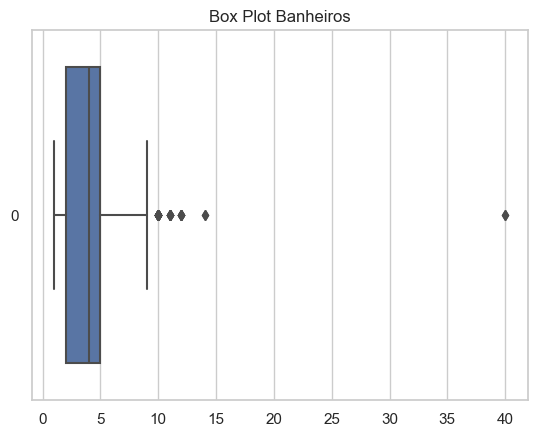

In [47]:
banheiros_comum = dados_vendas.query('Banheiros <= 40')
ax = sns.boxplot(data = dados_vendas.query('Banheiros <= 40')['Banheiros'], orient = 'horizontal')
ax.set_title('Box Plot Banheiros')

#### É explicita a presença de um outlier da quantidade de 40 banheiros, o que pode ser considerado anormal, com o auxilio da tabela abaixo fazendo a busca destes imoveis com 40 banheiros é possivel imaginar-se que esse valor de 40 banheiros são erros de digitação pois casas de aproximadamente 500 metros quadrados dificilmente teram 40 banheiros, ainda maisa contento 4 quartos apenas

In [48]:
dados_vendas.query('Banheiros == 40')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_Milhoes,Preço_do_m2
2062,NaN,Jardim Guedala,São Paulo,488,4,40,4,R$ 2.600.000,R$,2600000.00,None,2.60,5327.87
2159,NaN,Jardim Guedala,São Paulo,493,4,40,4,R$ 2.600.000,R$,2600000.00,None,2.60,5273.83


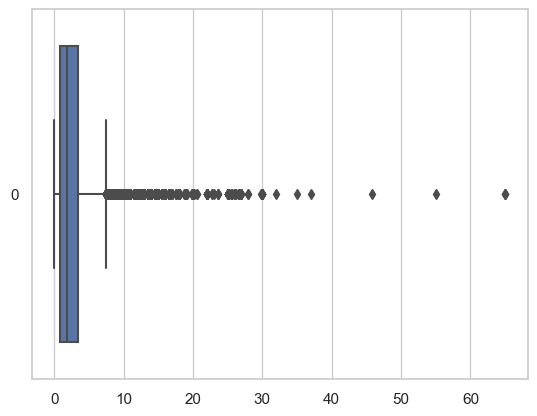

In [49]:
ax = sns.boxplot(data = dados_vendas['Valor_anuncio_Milhoes'], orient = 'horizontal')

##### Algumas residencias e imóveis a venda fogem dos padrões da cidade, como as no qual o valor se aproxima de 70 milhões de reais, mas pode se observar que a grande maioria dos imóveis estão abaixo dos 10 milhões, para uma melhor análise da distribuição dos valores a partir do boxplot seria necessário realizar o corte de alguns outliers

In [50]:
bairros_m = pd.DataFrame(dados_vendas.groupby('Bairro')['Metragem'].mean())
bairros_m = bairros_m.reset_index()
bairros_m = bairros_m.sort_values(by = 'Metragem', ascending = False)
bairros_m = bairros_m.head(10)
bairros_m

,Bairro,Metragem
424,Sítio Represa,37000.00
485,Vila Castelo,2850.00
168,Jardim Guedala,2754.14
307,Jardim das Camélias,1700.00
40,Chácara Flora,1251.44
272,Jardim Sílvia (Zona Oeste),1228.96
405,Retiro Morumbi,1136.39
454,Vila Aurora (Zona Norte),1082.50
339,Paineiras do Morumbi,754.83
156,Jardim Everest,734.62


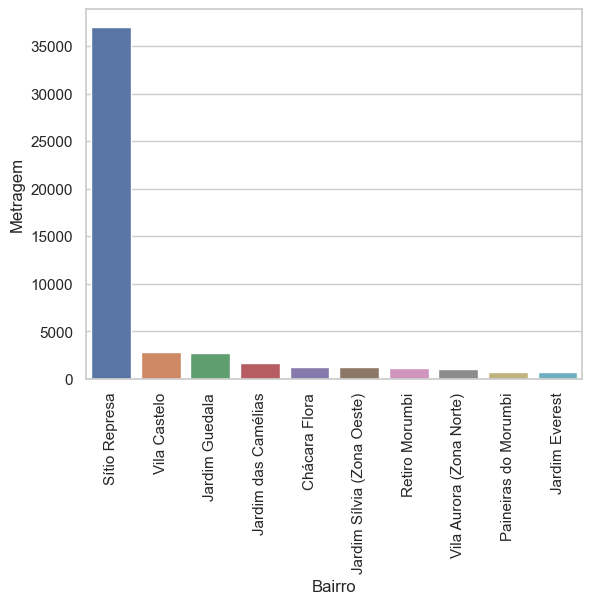

In [51]:
ax = sns.barplot(data=bairros_m, x="Bairro", y="Metragem")
plt.xticks(rotation=90)
plt.show()

In [52]:
dados_vendas.query('Bairro == "Sítio Represa"')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_Milhoes,Preço_do_m2
6600,Rua Benedito Felizardo,Sítio Represa,São Paulo,37000,4,2,4,R$ 2.900.000,R$,2900000.00,None,2.90,78.38


##### Devido a presença de um sitio de grande metragem, sendo o unico imóvel no bairro a metragem deste foi deslocada podendo se tornar um outlier

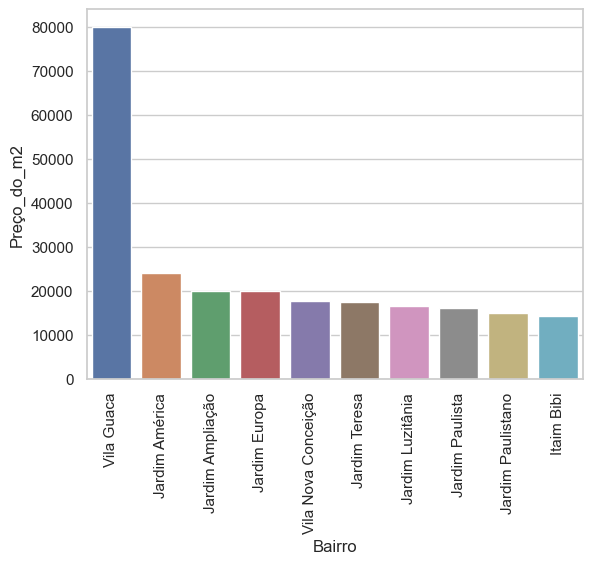

In [53]:
bairros_p = pd.DataFrame(dados_vendas.groupby('Bairro')['Preço_do_m2'].mean())
bairros_p = bairros_p.reset_index()
bairros_p= bairros_p.sort_values(by = 'Preço_do_m2', ascending = False)
bairros_p = bairros_p.head(10)
ax = sns.barplot(data=bairros_p, x="Bairro", y="Preço_do_m2")
plt.xticks(rotation=90)
plt.show()

In [54]:
dados_vendas.query('Bairro == "Alto de Pinheiros"')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_Milhoes,Preço_do_m2
83,"Rua Carlos Rath, 103",Alto de Pinheiros,São Paulo,400,5,4,4,R$ 2.900.000,R$,2900000.00,None,2.90,7250.00
84,NaN,Alto de Pinheiros,São Paulo,358,4,4,4,R$ 3.500.000,R$,3500000.00,None,3.50,9776.54
137,"Rua Aquiramun, 94",Alto de Pinheiros,São Paulo,450,5,6,5,R$ 5.500.000,R$,5500000.00,None,5.50,12222.22
214,"Rua Açaré, 63",Alto de Pinheiros,São Paulo,252,3,5,4,R$ 2.900.000,R$,2900000.00,None,2.90,11507.94
227,NaN,Alto de Pinheiros,São Paulo,360,3,5,4,R$ 4.950.000,R$,4950000.00,None,4.95,13750.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9691,NaN,Alto de Pinheiros,São Paulo,466,7,6,7,R$ 2.650.000,R$,2650000.00,None,2.65,5686.70
9696,Rua Sebastião Rodrigues,Alto de Pinheiros,São Paulo,150,3,2,2,R$ 2.150.000,R$,2150000.00,None,2.15,14333.33
9727,NaN,Alto de Pinheiros,São Paulo,466,7,6,7,R$ 2.650.000,R$,2650000.00,None,2.65,5686.70
9732,Rua Sebastião Rodrigues,Alto de Pinheiros,São Paulo,150,3,2,2,R$ 2.150.000,R$,2150000.00,None,2.15,14333.33


###### Analisando o gráfico acima relacionado ao preço médio do m2 quadrado por bairro, pode-se supor um erro nos dados do bairro vila guaca devido ao altissimo custo do valor de uma residencia de 10 metros quadrados

#### Realizar análises sobre os gráficos obtidos

### Aula 3

In [55]:
dados_bairro.query("Bairro in @top_bairros")

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_anuncio_Milhoes,Preço_do_m2
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,1764.82,11126.34
19,Brooklin Paulista,70002,778,862,832,475796789.00,475.80,6796.90
57,Cidade Jardim,132220,789,1008,1172,1164210900.00,1164.21,8805.10
155,Jardim Europa,118898,795,993,1056,2414172900.00,2414.17,20304.57
168,Jardim Guedala,972212,1443,2027,2161,1801165587.00,1801.17,1852.65
187,Jardim Leonor,97141,697,941,902,646326369.00,646.33,6653.49
227,Jardim Paulista,130283,1028,1231,1171,2136081000.00,2136.08,16395.70
338,Pacaembu,100285,774,889,1028,867956500.00,867.96,8654.90
396,Planalto Paulista,59250,636,768,713,374907000.00,374.91,6327.54
564,Vila Madalena,66250,739,786,712,583253030.00,583.25,8803.82


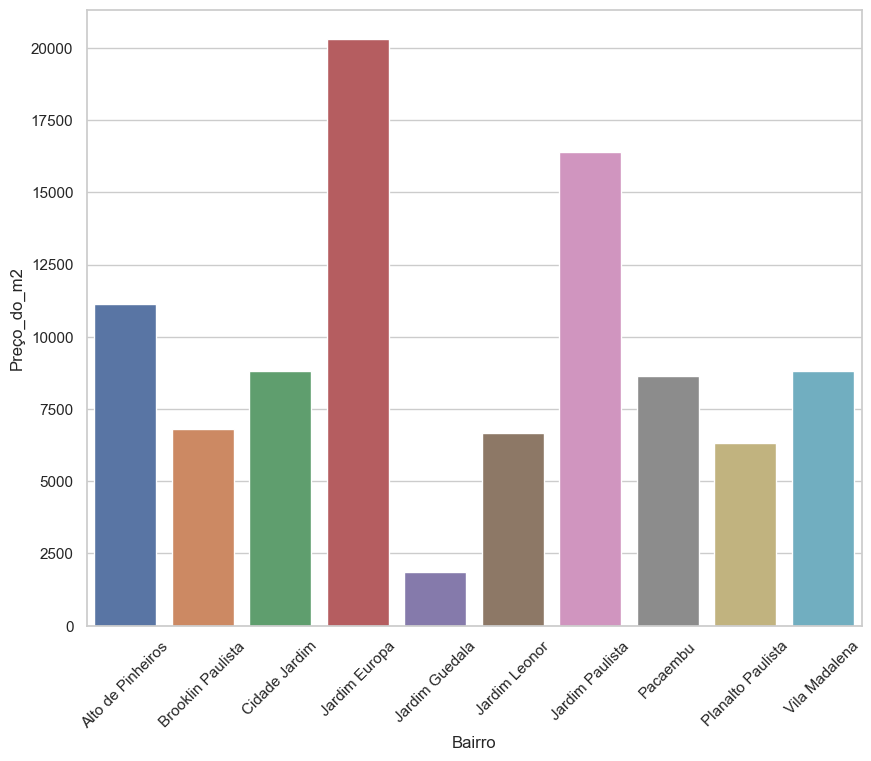

In [56]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="Bairro", y="Preço_do_m2", data=dados_bairro.query("Bairro in @top_bairros"))
ax.tick_params(axis='x', rotation=45)


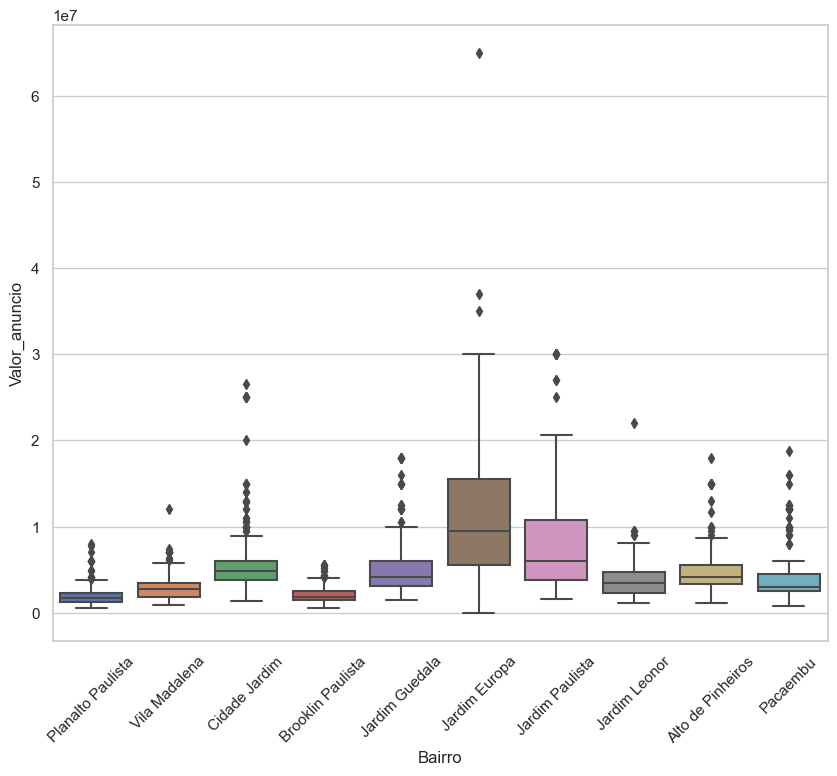

In [57]:
plt.figure(figsize = (10,8))
ax = sns.boxplot(data =dados_vendas.query('Bairro in @top_bairros'), x = 'Bairro', y = 'Valor_anuncio')
ax.tick_params(axis='x', rotation=45)
plt.show()

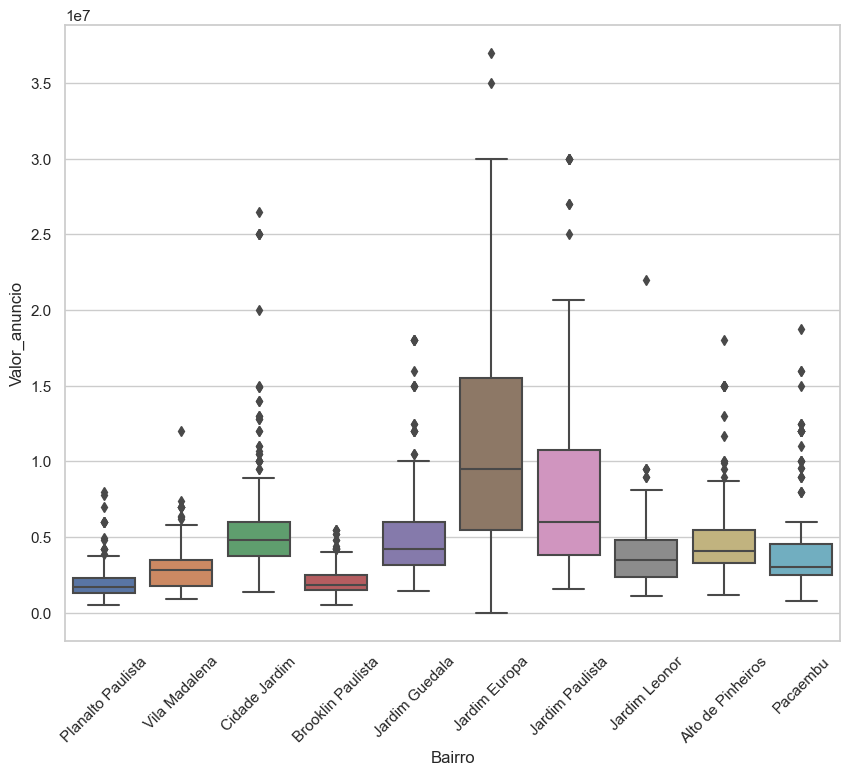

In [58]:
plt.figure(figsize = (10,8))
retirando_casa_70 = pd.DataFrame(dados_vendas.query('Valor_anuncio <= 50000000'))
ax = sns.boxplot(data =retirando_casa_70.query('Bairro in @top_bairros'), x = 'Bairro', y ='Valor_anuncio')
ax.tick_params(axis='x', rotation=45)
plt.show()

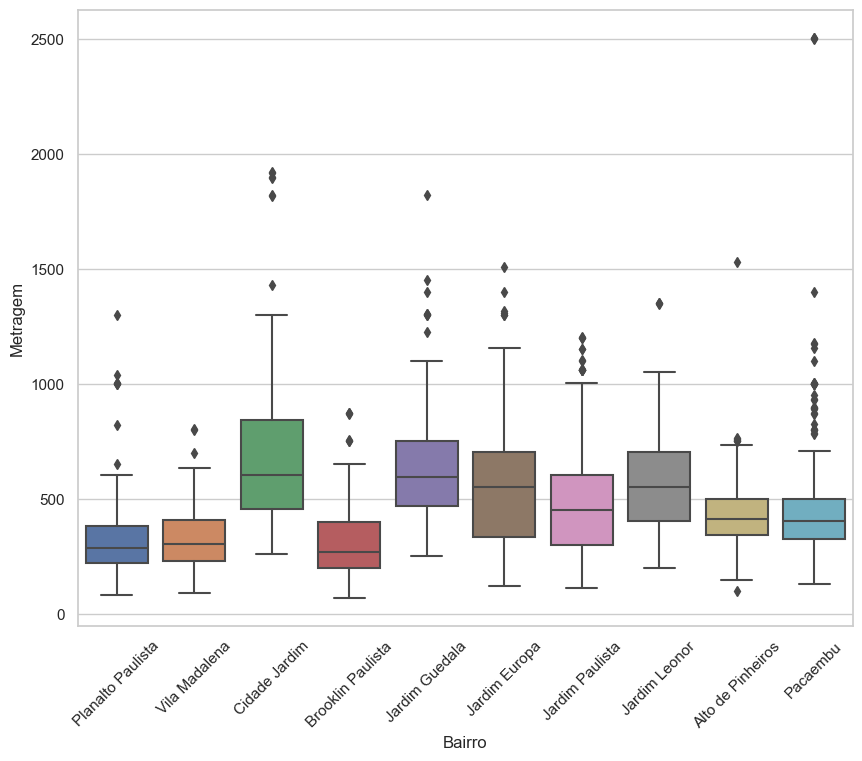

In [59]:
plt.figure(figsize = (10,8))
ax = sns.boxplot(data =dados_vendas.query('Bairro in @top_bairros & Metragem < 30000'), x = 'Bairro', y = 'Metragem')
ax.tick_params(axis='x', rotation=45)
plt.show()

#### Desafios
1 - Baixar corretamente os dados do IBGE

2 - Tentar vincular os dados do IBGE com dados de imóveis

3 - Remover outliers dos dados anteriores

4- Usar mair o groupby ex Vila Mariana N quartos e aachar o preço

5 - Reorganizar o notebook




In [60]:
describe = dados_vendas.describe()
describe

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_anuncio_Milhoes,Preço_do_m2
count,9156.00,9156.00,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96,3.05,8004.07
std,7856.42,1.05,1.97,2.60,3944208.19,3.94,5291.32
min,10.00,1.00,1.00,1.00,13000.00,0.01,9.33
25%,168.00,3.00,2.00,2.00,890000.00,0.89,4750.00
50%,276.00,3.00,4.00,4.00,1800000.00,1.80,6500.00
75%,450.00,4.00,5.00,5.00,3500000.00,3.50,9453.78
max,750000.00,16.00,40.00,50.00,65000000.00,65.00,80000.00


In [61]:
Q1_Metragem = describe.loc['25%'][0]
Q3_Metragem = describe.loc['75%'][0]
IQR_Metragem = Q3_Metragem - Q1_Metragem
Q1_Quartos = describe.loc['25%'][1]
Q3_Quartos = describe.loc['75%'][1]
IQR_Quartos = Q3_Quartos - Q1_Quartos
Q1_Banheiros = describe.loc['25%'][2]
Q3_Banheiros = describe.loc['75%'][2]
IQR_Banheiros = Q3_Banheiros - Q1_Banheiros
Q1_Vagas= describe.loc['25%'][3]
Q3_Vagas = describe.loc['75%'][3]
IQR_Vagas = Q3_Vagas - Q1_Vagas
Q1_Valor_anuncio = describe.loc['25%'][4]
Q3_Valor_anuncio = describe.loc['75%'][4]
IQR_Valor_anuncio= Q3_Valor_anuncio- Q1_Valor_anuncio
Q1_Valor_anuncio_Milhoes = describe.loc['25%'][5]
Q3_Valor_anuncio_Milhoes= describe.loc['75%'][5]
IQR_Valor_anuncio_Milhoes= Q3_Valor_anuncio_Milhoes - Q1_Valor_anuncio_Milhoes
Q1_Preço_do_m2 = describe.loc['25%'][6]
Q3_Preço_do_m2 = describe.loc['75%'][6]
IQR_Preço_do_m2 = Q3_Preço_do_m2 - Q1_Preço_do_m2

import pandas as pd

data = {
    'Column': ['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'Valor_anuncio', 'Valor_anuncio_Milhoes', 'Preço_do_m2'],
    'Q1': [Q1_Metragem, Q1_Quartos, Q1_Banheiros, Q1_Vagas, Q1_Valor_anuncio, Q1_Valor_anuncio_Milhoes, Q1_Preço_do_m2],
    'Q3': [Q3_Metragem, Q3_Quartos, Q3_Banheiros, Q3_Vagas, Q3_Valor_anuncio, Q3_Valor_anuncio_Milhoes, Q3_Preço_do_m2],
    'IQR': [IQR_Metragem, IQR_Quartos, IQR_Banheiros, IQR_Vagas, IQR_Valor_anuncio, IQR_Valor_anuncio_Milhoes, IQR_Preço_do_m2]
}

quartiles = pd.DataFrame(data)
quartiles['lower_bound'] = quartiles['Q1'] - (1.5* quartiles['IQR'])
quartiles['upper_bound'] = quartiles['Q3'] + (1.5* quartiles['IQR'])
quartiles

,Column,Q1,Q3,IQR,lower_bound,upper_bound
0,Metragem,168.00,450.00,282.00,-255.00,873.00
1,Quartos,3.00,4.00,1.00,1.50,5.50
2,Banheiros,2.00,5.00,3.00,-2.50,9.50
3,Vagas,2.00,5.00,3.00,-2.50,9.50
4,Valor_anuncio,890000.00,3500000.00,2610000.00,-3025000.00,7415000.00
5,Valor_anuncio_Milhoes,0.89,3.50,2.61,-3.02,7.42
6,Preço_do_m2,4750.00,9453.78,4703.78,-2305.67,16509.45


##### A partir dos outliers obtidos apenas será possivel realizar a remoção do upper_bound devido a presença de valores negativos no lower_bound

In [62]:
dados_sem_out = dados_vendas.query('Metragem <= 873 & Quartos <=5.5 & Banheiros <= 9.5 & Vagas <= 9.5 & Valor_anuncio <= 7415000.00 & Preço_do_m2 <=16509.45')
dados_sem_out

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_Milhoes,Preço_do_m2
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.00,None,3.70,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.00,None,0.38,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.00,None,0.69,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.00,None,0.54,5400.00
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,R$,1980000.00,None,1.98,4500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10001,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,R$ 960.000,R$,960000.00,None,0.96,6114.65
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1500000.00,None,1.50,5617.98
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665000.00,None,0.67,7000.00
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1050000.00,None,1.05,5121.95


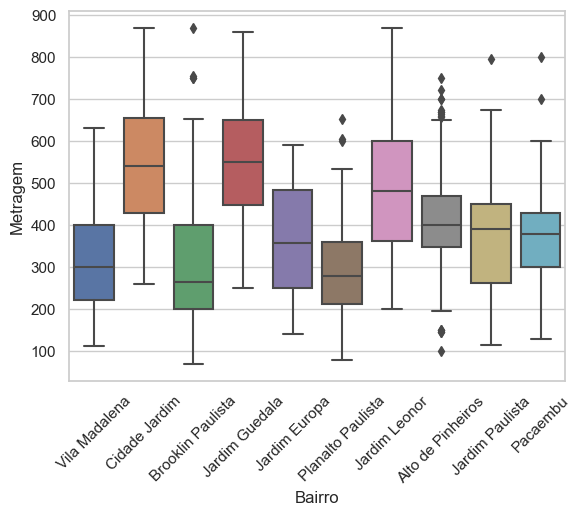

In [63]:
ax = sns.boxplot(data =dados_sem_out.query('Bairro in @top_bairros'), x = 'Bairro', y = 'Metragem')
ax.tick_params(axis='x', rotation=45)
plt.show()

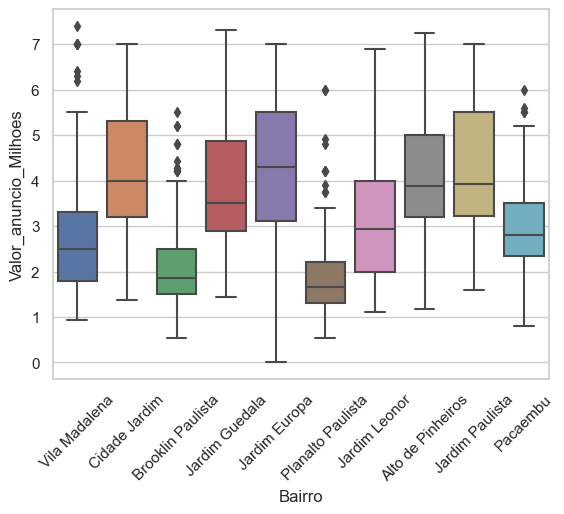

In [64]:
ax = sns.boxplot(data =dados_sem_out.query('Bairro in @top_bairros'), x = 'Bairro', y = 'Valor_anuncio_Milhoes')
ax.tick_params(axis='x', rotation=45)
plt.show()

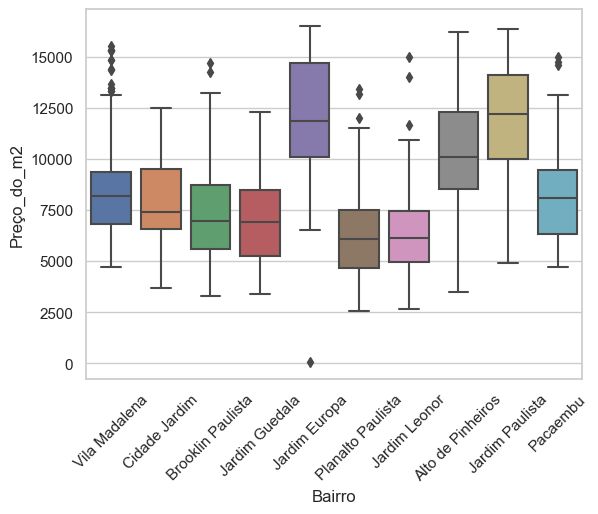

In [65]:
ax = sns.boxplot(data =dados_sem_out.query('Bairro in @top_bairros'), x = 'Bairro', y = 'Preço_do_m2')
ax.tick_params(axis='x', rotation=45)
plt.show()

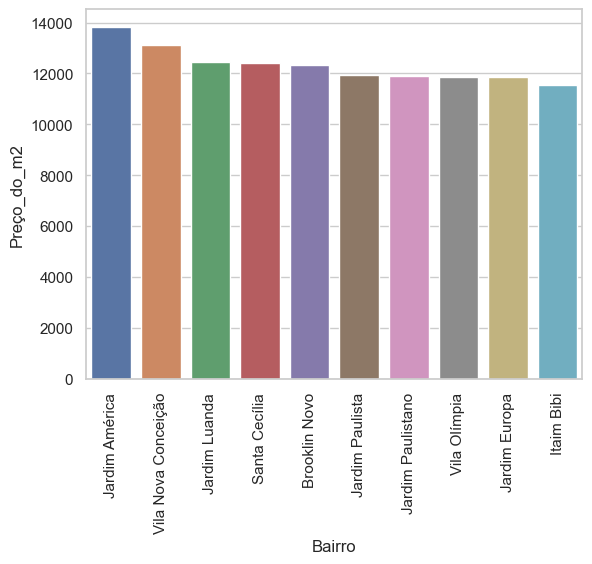

In [66]:
bairros_p = pd.DataFrame(dados_sem_out.groupby('Bairro')['Preço_do_m2'].mean())
bairros_p = bairros_p.reset_index()
bairros_p= bairros_p.sort_values(by = 'Preço_do_m2', ascending = False)
bairros_p = bairros_p.head(10)
ax = sns.barplot(data=bairros_p, x="Bairro", y="Preço_do_m2")
plt.xticks(rotation=90)
plt.show()

###### Usar mais o groupby ex Vila Mariana N quartos e achar o preço

In [67]:
grouped_data = dados_sem_out.groupby(['Bairro', 'Quartos'])[['Preço_do_m2','Metragem']].mean()
grouped_data = pd.DataFrame(grouped_data)
grouped_data.query('Bairro in @top_bairros')

Preço_do_m2  Metragem
Bairro            Quartos                       
Alto de Pinheiros 2           11166.67    300.00
                  3           10954.88    360.24
                  4           10121.07    422.22
                  5           10261.90    432.71
Brooklin Paulista 2            8550.59    159.12
                  3            7865.12    258.25
                  4            6287.61    370.21
                  5            6373.13    469.45
Cidade Jardim     2            8848.66    438.33
                  3            9916.88    409.63
                  4            7471.68    570.66
                  5            7189.90    604.96
Jardim Europa     3           11559.27    327.73
                  4           12290.34    412.33
Jardim Guedala    2            5054.46    419.33
                  3            7742.32    450.46
                  4            6948.53    571.48
                  5            6108.28    650.60
Jardim Leonor     3            6358.46    382.32
                  4            6188.99    526.98
                  5            6805.88    654.87
Jardim Paulista   2           13994.78    188.00
                  3           12314.51    330.46
                  4           10970.94    455.43
                  5           13515.95    407.00
Pacaembu          2            7826.43    349.17
                  3            8155.39    339.15
                  4            8203.04    396.24
                  5            8330.94    433.21
Planalto Paulista 2            5754.90    145.56
                  3            6159.98    272.59
                  4            6714.29    343.00
                  5            6870.34    338.00
Vila Madalena     1           12500.00    160.00
                  2            7937.71    181.83
                  3            9121.61    264.07
                  4            8105.46    373.26
                  5            8584.41    424.00

In [68]:
dados_sem_out.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_anuncio_Milhoes,Preço_do_m2
count,7634.00,7634.00,7634.00,7634.00,7634.00,7634.00,7634.00
mean,284.86,3.26,3.49,3.44,1955411.81,1.96,6731.07
std,164.08,0.82,1.69,1.74,1477789.93,1.48,2988.87
min,29.00,1.00,1.00,1.00,13000.00,0.01,34.40
25%,155.00,3.00,2.00,2.00,800000.00,0.80,4588.24
50%,248.00,3.00,3.00,3.00,1500000.00,1.50,6132.08
75%,385.00,4.00,5.00,4.00,2750000.00,2.75,8333.33
max,870.00,5.00,9.00,9.00,7410000.00,7.41,16500.00


In [69]:
filtered_data = dados_sem_out[(dados_sem_out['Bairro'] == 'Vila Madalena') & (dados_sem_out['Quartos'] == 1)]
filtered_data

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_Milhoes,Preço_do_m2
1502,Rua Colonização,Vila Madalena,São Paulo,160,1,3,2,R$ 2.000.000,R$,2000000.00,None,2.00,12500.00


In [70]:
ibge_caminho = "https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv"
dados_ibge = pd.read_csv(ibge_caminho, sep=';', encoding="ISO-8859-1", decimal=',')
dados_ibge = dados_ibge.drop(columns='Unnamed: 33')
dados_ibge['Nome_Grande_Regiao'] = dados_ibge['Nome_Grande_Regiao'].str.replace('ï¿½', 'ã')
dados_ibge['Nome_da_meso'] = dados_ibge['Nome_da_meso'].str.replace('ï¿½', 'ã')
dados_ibge['Nome_da_micro'] = dados_ibge['Nome_da_micro'].str.replace('ï¿½', 'ã')

dados_ibge

,Cod_setor,Cod_Grandes Regiï¿½es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Região Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,...,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,3,Região Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,...,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,3,Região Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,...,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,3,Região Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,...,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,3,Região Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,...,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18358,355030896000243,3,Região Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,...,3.50,2.61,772.09,168751.10,814.52,143188.21,467.46,191332.48,699.95,123399.08
18359,355030896000244,3,Região Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,...,3.87,2.49,692.50,239941.27,812.93,182516.20,439.33,194034.99,702.10,124952.38
18360,355030896000245,3,Região Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,...,3.90,2.54,630.06,329705.22,843.31,260395.90,347.60,228162.66,767.50,181129.99
18361,355030896000246,3,Região Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,...,4.29,4.21,597.37,349101.00,908.00,244391.67,397.76,436942.16,854.20,550319.43


In [71]:
dados_ibge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cod_setor              18363 non-null  int64  
 1   Cod_Grandes Regiï¿½es  18363 non-null  int64  
 2   Nome_Grande_Regiao     18363 non-null  object 
 3   Cod_UF                 18363 non-null  int64  
 4   Nome_da_UF             18363 non-null  object 
 5   Cod_meso               18363 non-null  int64  
 6   Nome_da_meso           18363 non-null  object 
 7   Cod_micro              18363 non-null  int64  
 8   Nome_da_micro          18363 non-null  object 
 9   Cod_RM                 18363 non-null  int64  
 10  Nome_da_RM             18363 non-null  object 
 11  Cod_municipio          18363 non-null  int64  
 12  Nome_do_municipio      18363 non-null  object 
 13  Cod_distrito           18363 non-null  int64  
 14  Nome_do_distrito       18363 non-null  object 
 15  Co

In [72]:
dados_ibge['Nome_do_bairro'].unique()

array(['Sï¿½O PAULO (todos os setores)'], dtype=object)

In [73]:
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_Milhoes,Preço_do_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.00,None,7.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.00,None,3.70,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.00,None,0.38,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.00,None,0.69,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.00,None,0.54,5400.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1500000.00,None,1.50,5617.98
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665000.00,None,0.67,7000.00
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2300000.00,None,2.30,3801.65
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1050000.00,None,1.05,5121.95


In [74]:
enderecos = pd.read_csv('enderecos.csv', low_memory = False)
enderecos.head(10)

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
0,Rua,Armando Silveira,Rua Armando Silveira,NaN,Divisa,Santana do Livramento,RS,97573200.00,-30.88,-55.55
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
2,Rua,Prefeito Agenor Barcelos Feio,Rua Prefeito Agenor Barcelos Feio,NaN,Registro,Santana do Livramento,RS,97571090.00,-30.86,-55.56
3,Rua,Sebastião Gomes,Rua Sebastião Gomes - até 59/60,59,Registro,Santana do Livramento,RS,97571374.00,-30.86,-55.55
4,Rua,Marquês do Alegrete,Rua Marquês do Alegrete,NaN,Parque das Águas,Santana do Livramento,RS,97571500.00,-30.86,-55.55
5,Rua,Prefeito João Jacinto Costa,Rua Prefeito João Jacinto Costa,NaN,Real,Santana do Livramento,RS,97572050.00,-30.86,-55.53
6,Rua,Vitorino Soares Pinto,Rua Vitorino Soares Pinto - de 1161/1162 ao fim,1161,Prado,Santana do Livramento,RS,97572216.00,-30.88,-55.53
7,Rua,Zeca Vieira,Rua Zeca Vieira - lado ímpar,l,Batuva,Santana do Livramento,RS,97572092.00,-30.87,-55.52
8,Rua,José Lupi,Rua José Lupi,NaN,Divisa,Santana do Livramento,RS,97573270.00,-30.88,-55.54
9,Rua,João José Lopes,Rua João José Lopes,NaN,Divisa,Santana do Livramento,RS,97573280.00,-30.88,-55.54


In [75]:
enderecos_sp = enderecos.query('sigla_uf == "SP"')
enderecos_sp.head(10)

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35
413273,Rua,A,Rua A,NaN,Iate Clube de Americana,Americana,SP,13475171.00,-22.73,-47.27
413274,Rua,Abelardo Fonseca,Rua Abelardo Fonseca,NaN,Campo Limpo,Americana,SP,13477070.00,-22.74,-47.33
413275,Rua,Abílio Rodrigues,Rua Abílio Rodrigues,NaN,São Benedito,Americana,SP,13476651.00,-22.74,-47.24
413276,Rua,Abolição,Rua Abolição,NaN,Vila Santa Catarina,Americana,SP,13466280.00,-22.75,-47.33
413277,Rua,das Acácias,Rua das Acácias,NaN,Jardim São Paulo,Americana,SP,13468150.00,-22.76,-47.34


In [76]:
enderecos_sp.loc[:, 'rua'] = enderecos_sp['tipo_logr'] + " " + enderecos_sp['logr_nome']
enderecos_sp.loc[:, 'rua'] = enderecos_sp['rua'].str.lower().str.strip()
enderecos_sp.head()

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude,rua
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45,rua joão antônio vasconcelos
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34,rua a
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35,rua a
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33,rua a
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35,rua joão bandini


In [77]:
dados_vendas.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_Milhoes,Preço_do_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.00,None,7.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.00,None,3.70,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.00,None,0.38,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.00,None,0.69,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.00,None,0.54,5400.00


In [78]:
dados_vendas["Rua"].str.extract(r'(^[\w ]+)')[:10]

,0
0,Avenida Itacira
1,Rua Aurelia Perez Alvarez
2,Rua Alba Valdez
3,NaN
4,Rua Tobias Barreto
5,Rua Graham Bell
6,Rua Francisco Paulo
7,Rua Guilherme Valente
8,Rua Sagrada Família
9,Rua Tapaji


In [79]:
dados_vendas['apenas_rua'] = dados_vendas["Rua"].str.extract(r'(^[\w ]+)')
dados_vendas['apenas_rua'] = dados_vendas['apenas_rua'].str.lower().str.strip()
dados_vendas.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_Milhoes,Preço_do_m2,apenas_rua
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.00,None,7.00,7000.00,avenida itacira
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.00,None,3.70,7459.68,rua aurelia perez alvarez
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.00,None,0.38,3040.00,rua alba valdez
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.00,None,0.69,2209.68,NaN
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.00,None,0.54,5400.00,rua tobias barreto


In [80]:
dados_geo= dados_vendas.merge(enderecos_sp[['rua','cep','latitude','longitude']] , left_on = 'apenas_rua', right_on = 'rua', how= 'left').drop_duplicates(subset =dados_vendas.columns).query('cep>0')
dados_geo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_Milhoes,Preço_do_m2,apenas_rua,rua,cep,latitude,longitude
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.00,None,7.00,7000.00,avenida itacira,avenida itacira,11443160.00,-23.98,-46.20
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.00,None,3.70,7459.68,rua aurelia perez alvarez,rua aurelia perez alvarez,4642020.00,-23.64,-46.69
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.00,None,0.38,3040.00,rua alba valdez,rua alba valdez,4845200.00,-23.75,-46.70
7,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.00,None,0.69,2209.68,NaN,NaN,18125000.00,-23.53,-47.26
26,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.00,None,0.54,5400.00,rua tobias barreto,rua tobias barreto,13474663.00,-22.70,-47.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89956,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1500000.00,None,1.50,5617.98,avenida odila,avenida odila,4058020.00,-23.61,-46.65
89958,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665000.00,None,0.67,7000.00,rua tapuçu,rua tapuçu,4671185.00,-23.66,-46.69
89959,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2300000.00,None,2.30,3801.65,rua guararema,rua guararema,13030640.00,-22.92,-47.08
89976,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1050000.00,None,1.05,5121.95,rua estero belaco,rua estero belaco,4145020.00,-23.62,-46.63


In [81]:
dados_ibge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cod_setor              18363 non-null  int64  
 1   Cod_Grandes Regiï¿½es  18363 non-null  int64  
 2   Nome_Grande_Regiao     18363 non-null  object 
 3   Cod_UF                 18363 non-null  int64  
 4   Nome_da_UF             18363 non-null  object 
 5   Cod_meso               18363 non-null  int64  
 6   Nome_da_meso           18363 non-null  object 
 7   Cod_micro              18363 non-null  int64  
 8   Nome_da_micro          18363 non-null  object 
 9   Cod_RM                 18363 non-null  int64  
 10  Nome_da_RM             18363 non-null  object 
 11  Cod_municipio          18363 non-null  int64  
 12  Nome_do_municipio      18363 non-null  object 
 13  Cod_distrito           18363 non-null  int64  
 14  Nome_do_distrito       18363 non-null  object 
 15  Co

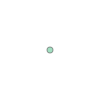

In [82]:
from shapely.geometry import Point
latitude = -23.56 	
longitude = -46.59
Point(longitude, latitude)

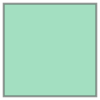

In [83]:
from shapely.geometry import Polygon
Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

In [84]:
Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]]).contains(Point(0.1,0.9))

True

In [85]:
import geopandas as gpd

In [86]:
setor_censo  = gpd.read_file('35SEE250GC_SIR.dbf')
setor_censo.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,98237.00,354100005000009,URBANO,35410000500,NaN,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,1,"POLYGON ((-46.41024 -24.01103, -46.41169 -24.0..."
1,98232.00,354100005000004,URBANO,35410000500,NaN,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,2,"POLYGON ((-46.41606 -24.00245, -46.41598 -24.0..."
2,98230.00,354100005000002,URBANO,35410000500,NaN,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,3,"POLYGON ((-46.41213 -24.00792, -46.41244 -24.0..."
3,98229.00,354100005000001,URBANO,35410000500,NaN,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,4,"POLYGON ((-46.41134 -24.00552, -46.41196 -24.0..."
4,98231.00,354100005000003,URBANO,35410000500,NaN,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,5,"POLYGON ((-46.41326 -24.00514, -46.41484 -24.0..."


In [87]:
setor_censo_sp = setor_censo[setor_censo.NM_MUNICIP == "SÃO PAULO"]
setor_censo_sp[setor_censo_sp.contains(Point(-46.2013172, -23.975993))]

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry


In [88]:
dados_geo["Point"] = ""
for i in dados_geo.index:
    dados_geo["Point"][i] = Point(dados_geo["longitude"][i], dados_geo["latitude"][i])

dados_geo['setor_censo'] = dados_geo["Point"].map(
    lambda x: setor_censo_sp.loc[setor_censo_sp.contains(x), 'CD_GEOCODI'].values
).str[0]
dados_geo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_Milhoes,Preço_do_m2,apenas_rua,rua,cep,latitude,longitude,Point,setor_censo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.00,None,7.00,7000.00,avenida itacira,avenida itacira,11443160.00,-23.98,-46.20,POINT (-46.2013172 -23.975993),NaN
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.00,None,3.70,7459.68,rua aurelia perez alvarez,rua aurelia perez alvarez,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.00,None,0.38,3040.00,rua alba valdez,rua alba valdez,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050
7,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.00,None,0.69,2209.68,NaN,NaN,18125000.00,-23.53,-47.26,POINT (-47.2550228 -23.5310431),NaN
26,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.00,None,0.54,5400.00,rua tobias barreto,rua tobias barreto,13474663.00,-22.70,-47.29,POINT (-47.2944609 -22.6989009),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89956,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1500000.00,None,1.50,5617.98,avenida odila,avenida odila,4058020.00,-23.61,-46.65,POINT (-46.6472577 -23.6090928),355030877000099
89958,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665000.00,None,0.67,7000.00,rua tapuçu,rua tapuçu,4671185.00,-23.66,-46.69,POINT (-46.6915206 -23.661018),355030816000087
89959,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2300000.00,None,2.30,3801.65,rua guararema,rua guararema,13030640.00,-22.92,-47.08,POINT (-47.0769595 -22.9227492),NaN
89976,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1050000.00,None,1.05,5121.95,rua estero belaco,rua estero belaco,4145020.00,-23.62,-46.63,POINT (-46.632983 -23.6161237),355030877000052


In [89]:
dados_geo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_Milhoes,Preço_do_m2,apenas_rua,rua,cep,latitude,longitude,Point,setor_censo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.00,None,7.00,7000.00,avenida itacira,avenida itacira,11443160.00,-23.98,-46.20,POINT (-46.2013172 -23.975993),NaN
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.00,None,3.70,7459.68,rua aurelia perez alvarez,rua aurelia perez alvarez,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.00,None,0.38,3040.00,rua alba valdez,rua alba valdez,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050
7,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.00,None,0.69,2209.68,NaN,NaN,18125000.00,-23.53,-47.26,POINT (-47.2550228 -23.5310431),NaN
26,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.00,None,0.54,5400.00,rua tobias barreto,rua tobias barreto,13474663.00,-22.70,-47.29,POINT (-47.2944609 -22.6989009),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89956,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1500000.00,None,1.50,5617.98,avenida odila,avenida odila,4058020.00,-23.61,-46.65,POINT (-46.6472577 -23.6090928),355030877000099
89958,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665000.00,None,0.67,7000.00,rua tapuçu,rua tapuçu,4671185.00,-23.66,-46.69,POINT (-46.6915206 -23.661018),355030816000087
89959,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2300000.00,None,2.30,3801.65,rua guararema,rua guararema,13030640.00,-22.92,-47.08,POINT (-47.0769595 -22.9227492),NaN
89976,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1050000.00,None,1.05,5121.95,rua estero belaco,rua estero belaco,4145020.00,-23.62,-46.63,POINT (-46.632983 -23.6161237),355030877000052


In [90]:
dados_geo2 = pd.read_csv('dados_geo.csv')
dados_geo2.head(2)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,Valor_mm,Valor_m2,rua,cep,latitude,longitude,Point,setor_censo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.00,NaN,7.00,7000.00,Avenida Itacira,4061000.00,-23.62,-46.65,POINT (-46.6481622 -23.6157934),355030877000067.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.00,NaN,3.70,7459.68,Rua Aurelia Perez Alvarez,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023.00


In [91]:
dados_ibge.head(2)

,Cod_setor,Cod_Grandes Regiï¿½es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Região Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,...,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,3,Região Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,...,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94


In [92]:
dados_vendas_censo = dados_geo2.merge(dados_ibge, left_on = 'setor_censo', right_on= 'Cod_setor', how  = 'left')
dados_vendas_censo 

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.00,NaN,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.00,NaN,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.00,NaN,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.00,NaN,...,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000.00,NaN,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5600,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,1500000.00,NaN,...,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
5601,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,665000.00,NaN,...,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
5602,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,2300000.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5603,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,1050000.00,NaN,...,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


<AxesSubplot: xlabel='V005', ylabel='Valor_m2'>

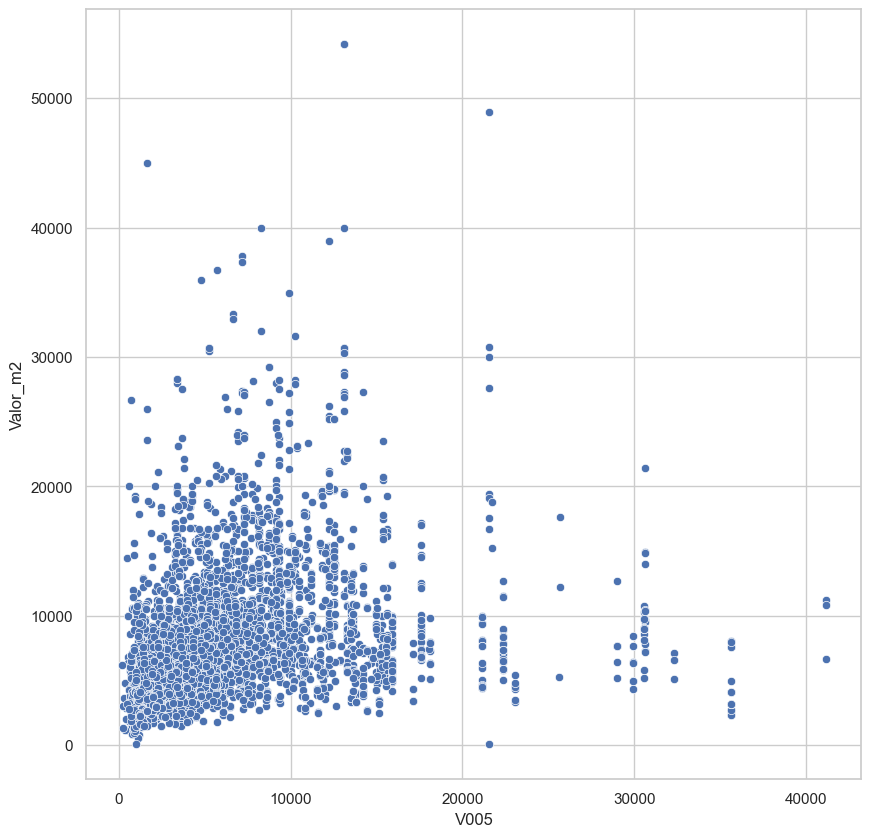

In [93]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = dados_vendas_censo, x="V005", y="Valor_m2")

<AxesSubplot: xlabel='V005', ylabel='Metragem'>

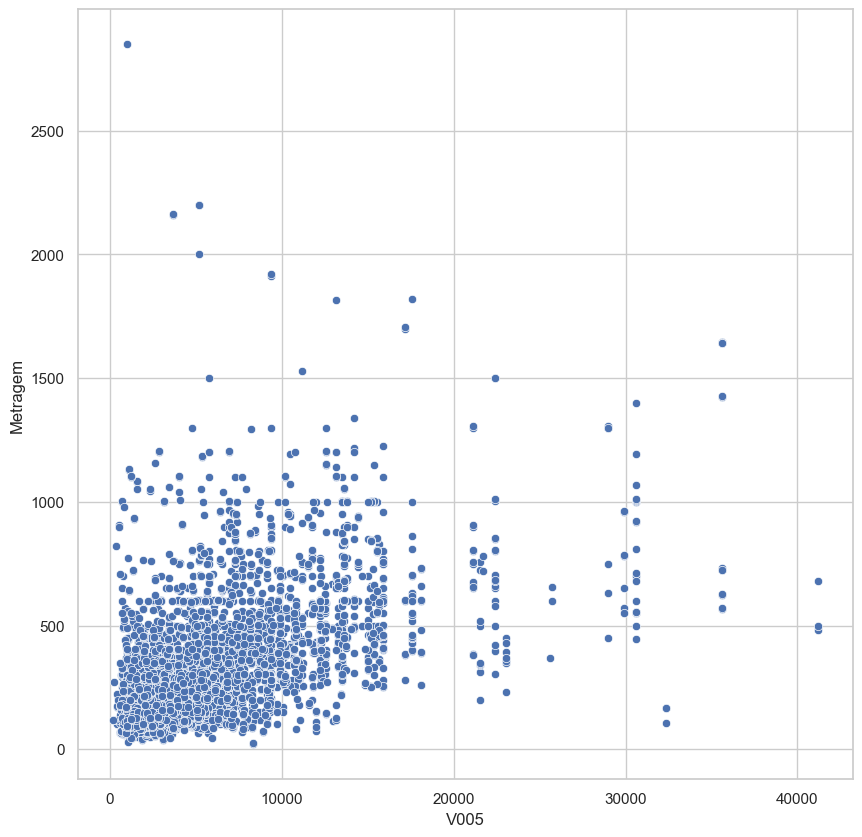

In [94]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = dados_vendas_censo.query('Metragem <10000'), x="V005", y="Metragem")

In [95]:
dados_vendas_censo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5605 entries, 0 to 5604
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rua                    5605 non-null   object 
 1   Bairro                 5597 non-null   object 
 2   Cidade                 5605 non-null   object 
 3   Metragem               5605 non-null   int64  
 4   Quartos                5605 non-null   int64  
 5   Banheiros              5605 non-null   int64  
 6   Vagas                  5605 non-null   int64  
 7   Valor                  5605 non-null   object 
 8   Valor_anuncio          5605 non-null   float64
 9   Tipo_anuncio           0 non-null      float64
 10  Valor_mm               5605 non-null   float64
 11  Valor_m2               5605 non-null   float64
 12  rua                    5605 non-null   object 
 13  cep                    5605 non-null   float64
 14  latitude               5605 non-null   float64
 15  long

##### Desáfio:
Relacionar utilizando bairros e depois rua e numero da casa

1 - Realizar uma análise dos dados do IBGE por mapa, analisando a distribuição de renda (https://medium.com/creditas-tech/dados-georreferenciados-explora%C3%A7%C3%A3o-e-visualiza%C3%A7%C3%A3o-com-python-edd51e7c53da)

2 - Repassar a aula para entender melhor o que foi realizado

3 - Aprofundar a análise entre dados de vendas e renda.

4 - Realizar a análise exploratória e encontrar variáveis relevantes para solução do problema.

In [96]:
import geopandas as gpd
sp = shp_ibge = gpd.read_file('SP_Setores_2021.dbf')

In [97]:
sao = sp[sp['NM_MUN'] == 'SÃ£o Paulo'].reset_index(drop=True)
sao.head(2)

,CD_SETOR,CD_SIT,NM_SIT,CD_UF,NM_UF,SIGLA_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,CD_SUBDIST,NM_SUBDIST,geometry
0,355030801000001,1,Ãrea Urbana de Alta Densidade de EdificaÃ§Ãµes,35,SÃ£o Paulo,SP,3550308,SÃ£o Paulo,355030801,Ãgua Rasa,35503080100,NaN,"POLYGON ((-46.56954 -23.56918, -46.57016 -23.5..."
1,355030801000002,1,Ãrea Urbana de Alta Densidade de EdificaÃ§Ãµes,35,SÃ£o Paulo,SP,3550308,SÃ£o Paulo,355030801,Ãgua Rasa,35503080100,NaN,"POLYGON ((-46.56806 -23.56521, -46.56786 -23.5..."


Text(0.5, 1.0, 'Setores Censitários - São Paulo')

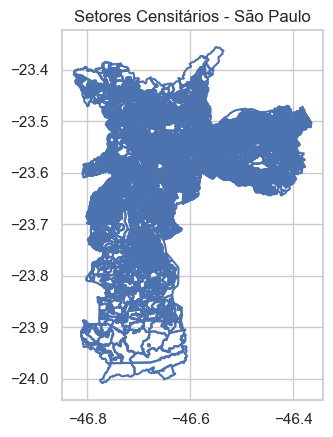

In [98]:
ax3 = sao.boundary.plot()
ax3.set_title('Setores Censitários - São Paulo')

In [99]:
dados_vendas_censo.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Tipo_anuncio,Valor_mm,Valor_m2,cep,latitude,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
count,5605.00,5605.00,5605.00,5605.00,5605.00,0.00,5605.00,5605.00,5605.00,5605.00,...,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00
mean,332.57,3.40,3.70,3.80,2739675.01,NaN,2.74,7716.49,4165052.42,-23.54,...,3.01,2.12,5859.24,190315010.55,6790.83,256857648.58,3247.50,109127681.78,4837.83,189910561.45
std,547.72,1.03,1.84,2.45,3595819.11,NaN,3.60,4932.18,1450587.26,0.31,...,0.39,0.94,5107.95,933436369.49,5957.50,1761201586.50,2261.85,514376701.69,3637.45,1338262292.22
min,10.00,1.00,1.00,1.00,13000.00,NaN,0.01,65.00,1107060.00,-24.90,...,1.61,0.70,174.91,98355.48,584.26,70021.07,91.16,106814.59,547.47,58440.21
25%,160.00,3.00,2.00,2.00,850000.00,NaN,0.85,4708.33,3404030.00,-23.61,...,2.77,1.72,2437.72,7993781.82,2870.77,8187213.28,1605.57,5614213.08,2303.08,6241508.75
50%,255.00,3.00,3.00,3.00,1600000.00,NaN,1.60,6428.57,4524000.00,-23.58,...,3.02,2.05,4385.96,26937466.70,5180.14,26955910.12,2788.53,18140427.35,4010.21,22218585.14
75%,407.00,4.00,5.00,5.00,3180000.00,NaN,3.18,9148.94,5429030.00,-23.55,...,3.28,2.40,7600.23,95863644.54,8816.06,102000570.47,4291.69,56436140.20,6182.71,70195016.01
max,37000.00,11.00,14.00,38.00,65000000.00,NaN,65.00,80000.00,8473440.00,-14.24,...,5.21,32.90,41175.73,19436679037.42,50741.20,35468624352.67,20651.94,9521545092.67,40653.97,28642067613.82


In [100]:
dados_vendas_censo['Cod_setor']

0      355030877000067.00
1      355030871000023.00
2      355030830000050.00
3      355030808000050.00
4      355030865000169.00
              ...        
5600   355030877000099.00
5601   355030816000087.00
5602                  NaN
5603   355030877000052.00
5604   355030893000077.00
Name: Cod_setor, Length: 5605, dtype: float64

In [101]:
bairros_50_v0005 = dados_vendas_censo.query('V005 >= 4381.23')['Cod_setor']
bairros_50_v0005 = bairros_50_v0005.astype(str).str.strip('.00')
bairros_50_v0007 = dados_vendas_censo.query('V007 >= 5180.14')['Cod_setor']
bairros_50_v0007 = bairros_50_v0007.astype(str).str.strip('.00')
bairros_75_v0007 = dados_vendas_censo.query('V007 >= 8816.06')['Cod_setor']
bairros_75_v0007 = bairros_75_v0007.astype(str).str.strip('.00')
bairros_75_v0010 = dados_vendas_censo.query('V010 >= 56436140.20')['Cod_setor']
bairros_75_v0010 = bairros_75_v0010.astype(str).str.strip('.00')

In [102]:
dados_vendas_censo.query('Cod_setor in @bairros_50_v0005')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012


In [103]:
sao2 = setor_censo[setor_censo['NM_MUNICIP'] == 'SÃO PAULO'].reset_index(drop=True)
sao2 = sao2.query('CD_GEOCODI in @bairros_50_v0005')

Text(0.5, 1.0, 'Setores Censitários - São Paulo')

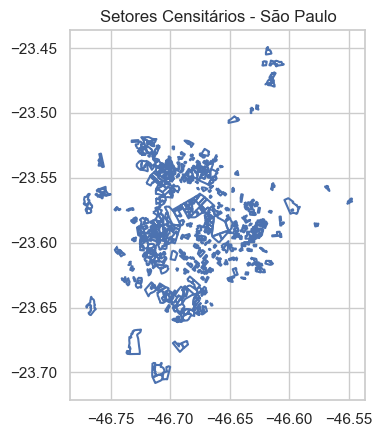

In [104]:
ax2 = sao2.boundary.plot()
ax2.set_title('Setores Censitários - São Paulo')

In [105]:
sao3 = setor_censo[setor_censo['NM_MUNICIP'] == 'SÃO PAULO'].reset_index(drop=True)
sao3 = sao3.query('CD_GEOCODI in @bairros_50_v0007')

Text(0.5, 1.0, 'Setores Censitários - São Paulo')

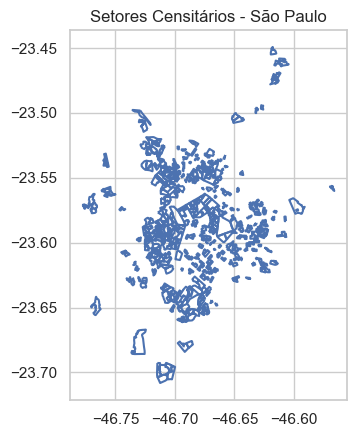

In [106]:
ax3 = sao3.boundary.plot()
ax3.set_title('Setores Censitários - São Paulo')

Text(0.5, 1.0, 'Setores Censitários - São Paulo')

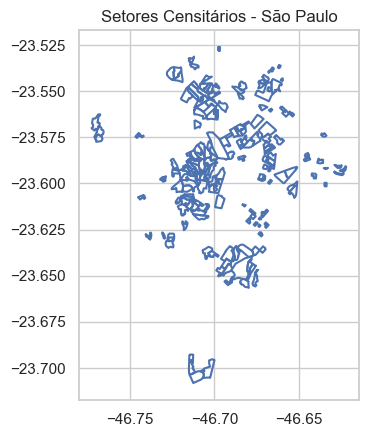

In [107]:
sao4 = setor_censo[setor_censo['NM_MUNICIP'] == 'SÃO PAULO'].reset_index(drop=True)
sao4 = sao4.query('CD_GEOCODI in @bairros_75_v0007')
ax4 = sao4.boundary.plot()
ax4.set_title('Setores Censitários - São Paulo')

Text(0.5, 1.0, 'Setores Censitários - São Paulo')

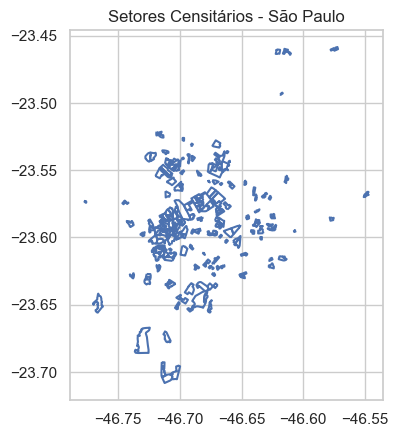

In [108]:
sao5 = setor_censo[setor_censo['NM_MUNICIP'] == 'SÃO PAULO'].reset_index(drop=True)
sao5 = sao5.query('CD_GEOCODI in @bairros_75_v0010')
ax5 = sao5.boundary.plot()
ax5.set_title('Setores Censitários - São Paulo')

Análise preço do imovel x renda V005 E V007

In [109]:
dados_vendas_censo.head(1)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.00,NaN,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74


In [110]:
import seaborn as sns

In [111]:
dados_grouped = dados_vendas_censo.groupby('Cod_setor')[['Valor_anuncio','V005','V007','Metragem']].mean()

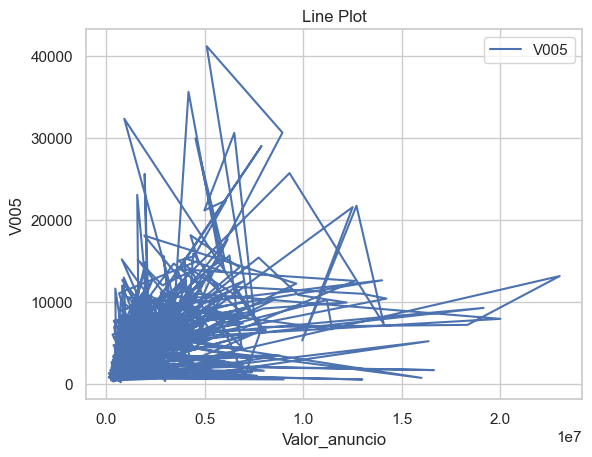

In [112]:
dados_grouped.plot(x="Valor_anuncio", y="V005", kind="line")

# Add labels and title
plt.xlabel("Valor_anuncio")
plt.ylabel("V005")
plt.title("Line Plot")

# Show the plot
plt.show()

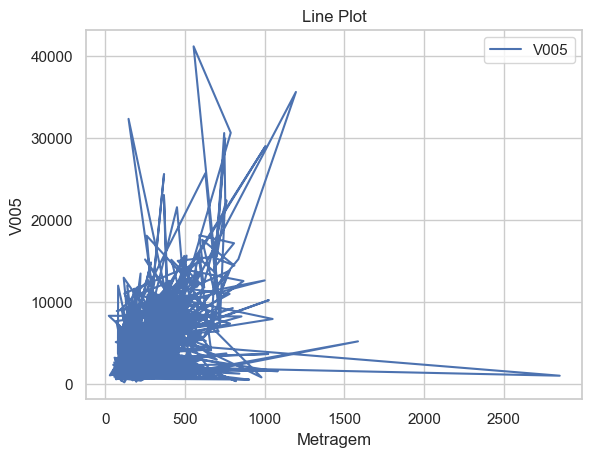

In [113]:
dados_grouped.query('Metragem < 30000').plot(x="Metragem", y="V005", kind="line")

# Add labels and title
plt.xlabel("Metragem")
plt.ylabel("V005")
plt.title("Line Plot")

# Show the plot
plt.show()

### Aula 5

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set()

dados_vendas_censo = dados_vendas_censo[['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas',
       'Valor_anuncio', 'Valor_mm', 'Valor_m2', 'latitude', 'longitude', 'Situacao_setor', 'V001',
       'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010',
       'V011', 'V012']].dropna()
dados_vendas_censo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7.00,7000.00,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,3.70,7459.68,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,0.38,3040.00,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,0.54,5400.00,...,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.00,1.98,4500.00,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5599,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,960000.00,0.96,6114.65,...,2.17,1.27,5054.58,33245189.73,5231.93,33485189.78,3649.06,26562232.53,4551.66,29032823.35
5600,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.00,1.50,5617.98,...,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
5601,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.00,0.67,7000.00,...,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
5603,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.00,1.05,5121.95,...,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


In [115]:
dados_vendas_censo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5308 entries, 0 to 5604
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rua             5308 non-null   object 
 1   Bairro          5308 non-null   object 
 2   Cidade          5308 non-null   object 
 3   Metragem        5308 non-null   int64  
 4   Quartos         5308 non-null   int64  
 5   Banheiros       5308 non-null   int64  
 6   Vagas           5308 non-null   int64  
 7   Valor_anuncio   5308 non-null   float64
 8   Valor_mm        5308 non-null   float64
 9   Valor_m2        5308 non-null   float64
 10  latitude        5308 non-null   float64
 11  longitude       5308 non-null   float64
 12  Situacao_setor  5308 non-null   float64
 13  V001            5308 non-null   float64
 14  V002            5308 non-null   float64
 15  V003            5308 non-null   float64
 16  V004            5308 non-null   float64
 17  V005            5308 non-null   f

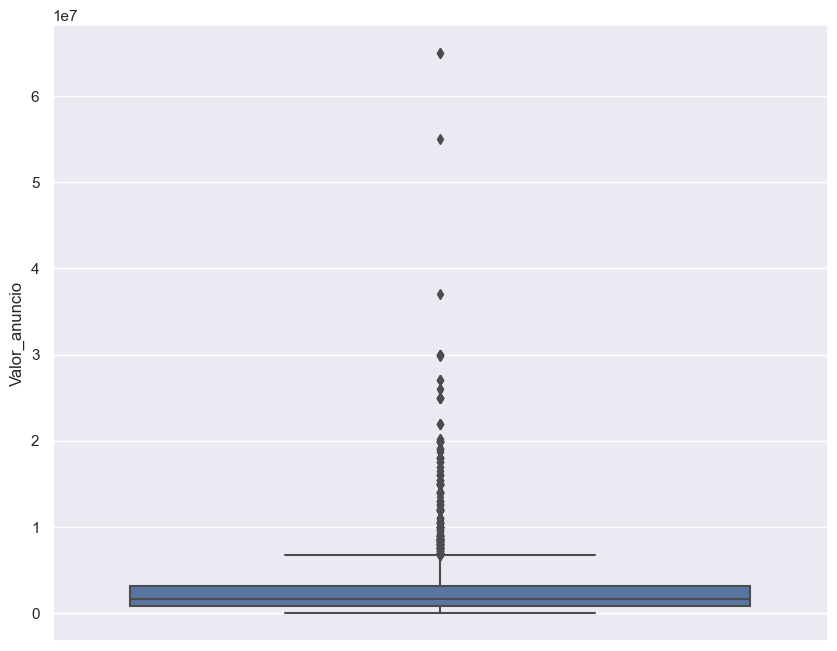

In [116]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas_censo, y="Valor_anuncio" )
plt.show()

In [117]:
dados_vendas_censo.query("Valor_anuncio > 30000000 | Valor_anuncio < 100000")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
54,Rua Inglaterra,Jardim Europa,São Paulo,200,3,3,2,13000.00,0.01,65.00,...,3.13,2.87,21545.71,1577883376.43,26081.65,1794039881.36,11050.67,882338714.47,15470.93,1168079134.43
89,Rua Inglaterra,Jardim Europa,São Paulo,756,5,4,10,37000000.00,37.00,48941.80,...,3.13,2.87,21545.71,1577883376.43,26081.65,1794039881.36,11050.67,882338714.47,15470.93,1168079134.43
1032,Praça Nicolau Scarpa,Jardim América,São Paulo,1200,4,4,25,65000000.00,65.00,54166.67,...,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91,364776324.15,10168.24,445001716.57
3521,Rua Estados Unidos,Jardim América,São Paulo,1816,4,10,20,55000000.00,55.00,30286.34,...,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91,364776324.15,10168.24,445001716.57
3896,Rua Estados Unidos,Jardim América,São Paulo,1200,4,6,24,65000000.00,65.00,54166.67,...,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91,364776324.15,10168.24,445001716.57


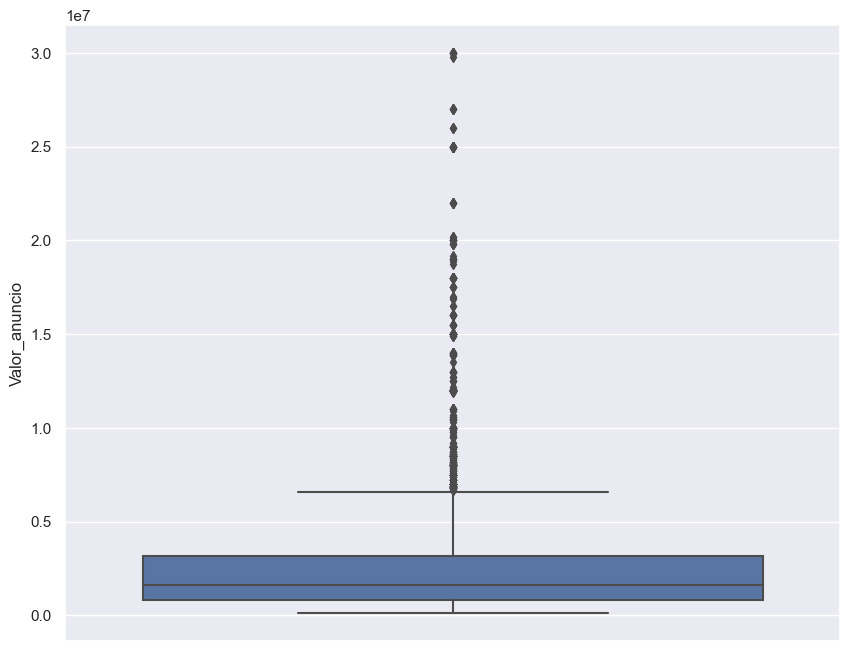

In [118]:
dados_vendas_censo.drop(dados_vendas_censo.query("Valor_anuncio > 30000000 | Valor_anuncio < 100000").index, inplace = True)
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas_censo, y="Valor_anuncio")
plt.show()

In [119]:
dados_vendas_censo.head(1)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7.00,7000.00,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74


<AxesSubplot: xlabel='Valor_anuncio', ylabel='Valor_m2'>

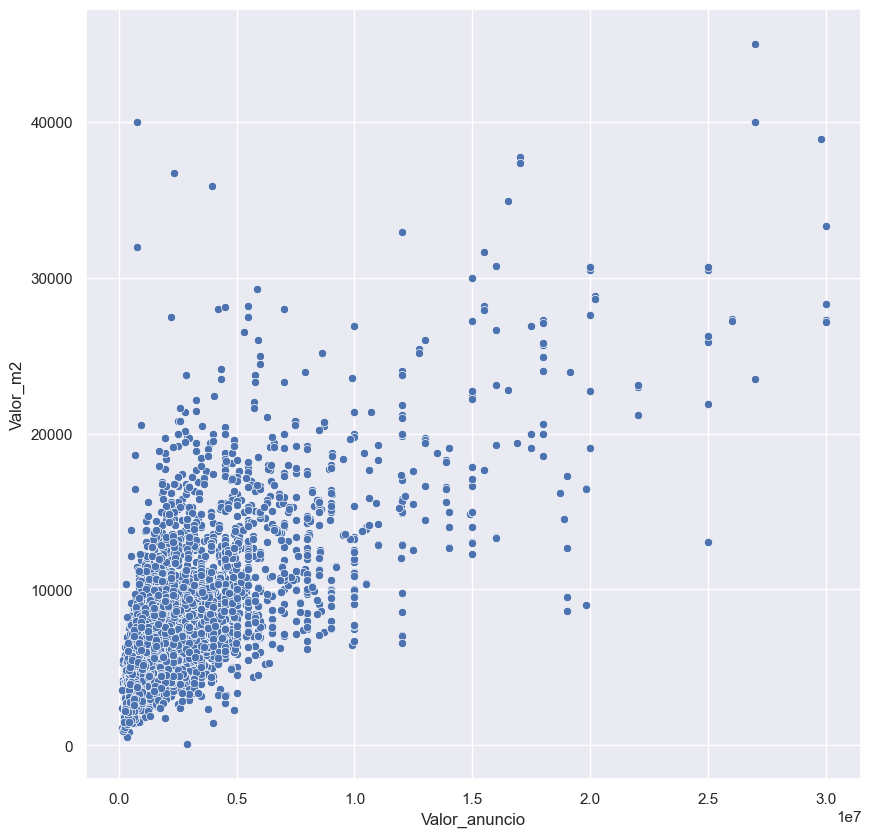

In [120]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = dados_vendas_censo, x="Valor_anuncio", y="Valor_m2")

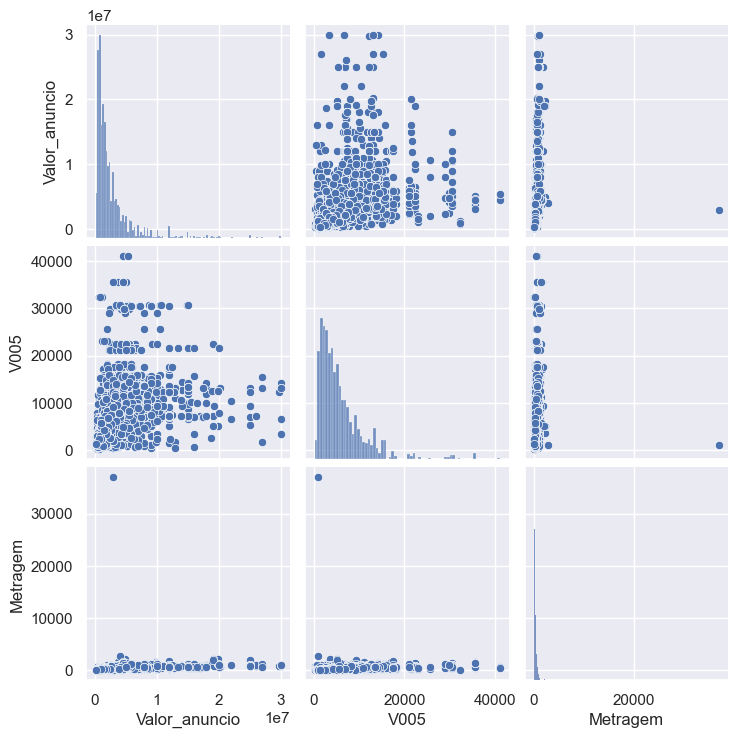

In [121]:
sns.pairplot(dados_vendas_censo[['Valor_anuncio', 'V005','Metragem']])

In [122]:
dados_vendas_censo.corr()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,latitude,longitude,Situacao_setor,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
Metragem,1.00,0.23,0.23,0.27,0.30,0.30,0.06,-0.09,-0.13,0.48,...,0.13,0.05,0.22,0.07,0.23,0.05,0.20,0.07,0.21,0.05
Quartos,0.23,1.00,0.55,0.42,0.37,0.37,0.12,-0.01,-0.19,-0.01,...,0.16,0.07,0.32,0.12,0.33,0.11,0.31,0.13,0.32,0.11
Banheiros,0.23,0.55,1.00,0.46,0.47,0.47,0.22,-0.03,-0.25,-0.03,...,0.21,0.07,0.41,0.11,0.41,0.08,0.39,0.11,0.40,0.08
Vagas,0.27,0.42,0.46,1.00,0.48,0.48,0.15,-0.04,-0.19,-0.01,...,0.24,0.09,0.34,0.11,0.34,0.08,0.32,0.12,0.33,0.09
Valor_anuncio,0.30,0.37,0.47,0.48,1.00,1.00,0.70,0.02,-0.21,-0.00,...,0.13,0.08,0.45,0.11,0.45,0.07,0.47,0.13,0.45,0.08
Valor_mm,0.30,0.37,0.47,0.48,1.00,1.00,0.70,0.02,-0.21,-0.00,...,0.13,0.08,0.45,0.11,0.45,0.07,0.47,0.13,0.45,0.08
Valor_m2,0.06,0.12,0.22,0.15,0.70,0.70,1.00,0.05,-0.18,-0.03,...,-0.13,0.01,0.29,0.04,0.28,0.02,0.37,0.05,0.32,0.02
latitude,-0.09,-0.01,-0.03,-0.04,0.02,0.02,0.05,1.00,0.15,-0.03,...,-0.05,0.03,-0.05,-0.09,-0.07,-0.07,-0.04,-0.07,-0.07,-0.06
longitude,-0.13,-0.19,-0.25,-0.19,-0.21,-0.21,-0.18,0.15,1.00,-0.01,...,-0.05,0.02,-0.36,-0.10,-0.36,-0.07,-0.38,-0.10,-0.37,-0.07
Situacao_setor,0.48,-0.01,-0.03,-0.01,-0.00,-0.00,-0.03,-0.03,-0.01,1.00,...,0.03,0.00,-0.03,-0.01,-0.03,-0.01,-0.04,-0.01,-0.03,-0.00


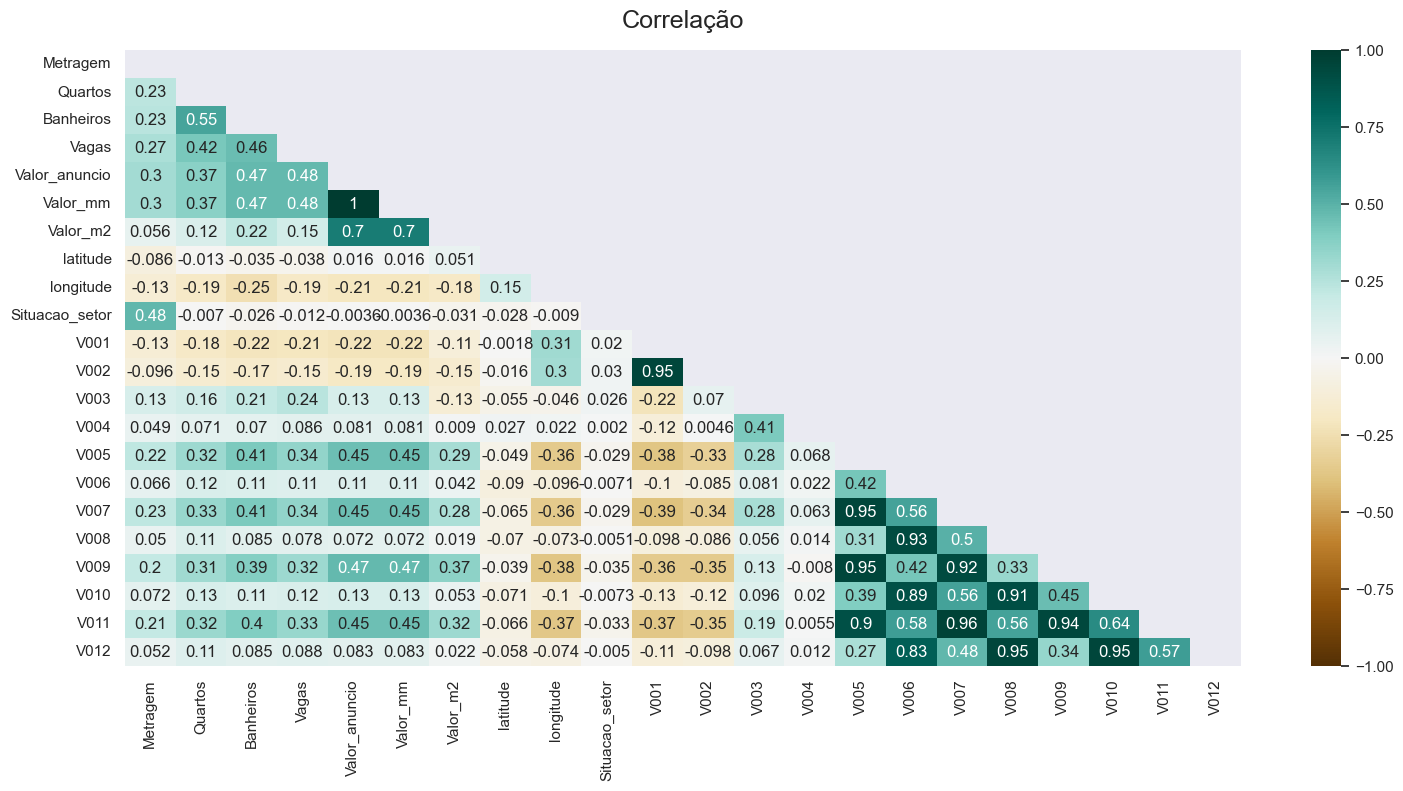

In [123]:
plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
mask = np.triu(np.ones_like(dados_vendas_censo.corr(), dtype=bool))
heatmap = sns.heatmap(dados_vendas_censo.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação', fontdict={'fontsize':18}, pad=16);

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = dados_vendas_censo[["Metragem"]]
Y = dados_vendas_censo["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)
lr = LinearRegression()

In [125]:
X_train

,Metragem
3522,105
881,240
769,324
3364,484
4674,103
...,...
3558,397
3994,224
5432,238
4044,300


In [126]:
lr.fit(X_train, Y_train)

LinearRegression()

In [127]:
Y_predict_test = lr.predict(X_test)

In [128]:
Y_test

172    4500000.00
4513    345000.00
4865    800000.00
4979   4000000.00
1255   5100000.00
          ...    
5240   1600000.00
4472    580000.00
3291   2200000.00
432    1500000.00
2455   2800000.00
Name: Valor_anuncio, Length: 1326, dtype: float64

In [129]:
Y_predict_train = lr.predict(X_train)
Y_predict_train 

array([2382512.85448673, 2571462.18044402, 2689030.64992855, ...,
       2568662.93117058, 2655439.65864726, 2495882.4500611 ])

In [130]:
Y_train

3522    692000.00
881    1490000.00
769    2100000.00
3364   6700000.00
4674    622500.00
          ...    
3558   4280000.00
3994   1500000.00
5432   2300000.00
4044   1600000.00
948    3280000.00
Name: Valor_anuncio, Length: 3977, dtype: float64

In [131]:
from sklearn.metrics import mean_absolute_error, r2_score


mean_absolute_error(Y_test, Y_predict_test)

1770626.9062636306

In [132]:
mean_absolute_error(Y_train, Y_predict_train)

1825220.303454906

In [133]:
X = dados_vendas_censo[['Metragem', 'Quartos', 'Banheiros','latitude','longitude','Situacao_setor', 
                        'Vagas','V001','V007', 'V009','V011']]
Y = dados_vendas_censo["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)
lr.fit(X_train, Y_train)
Y_predict_test = lr.predict(X_test)
Y_predict_train = lr.predict(X_train)
mae_test = mean_absolute_error(Y_test, Y_predict_test)
r2_test = r2_score(Y_test, Y_predict_test)
mae_train = mean_absolute_error(Y_train, Y_predict_train)
r2_train = r2_score(Y_train, Y_predict_train)

In [134]:
mae_test

1343704.3420636118

In [135]:
r2_test

0.3833119564110399

In [136]:
mae_train

1355583.0853255552

In [137]:
r2_train

0.4042941208384927

<AxesSubplot: xlabel='Valor_anuncio'>

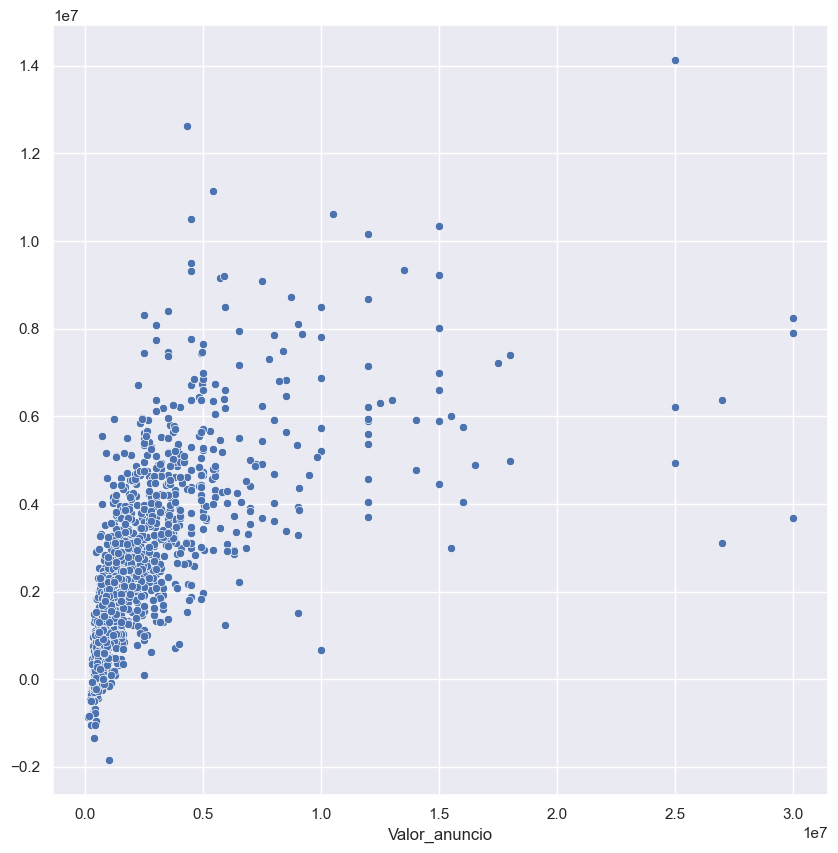

In [138]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=Y_test, y=Y_predict_test)

##### Desafios

1 - Adicionar o valor "real" do m² do imóvel. ok - alguns bairros

2 - Testar outro modelo de regressão. ok

3 - Criar um modelo baseline com as features originais. ok

4 - Trabalhar mais nos dados e criar novas variáveis.

5 - Testar as predições para casos reais. ok

6 - Criar um projeto com os resultados da Imersão e postar nas redes sociais mostrando o trabalho realizado. Lembre-se de marcar a @AluraOnline e utilizar as hashtags #ImersãoDados e #ImersãoDados4.

##### Criação da base line para futuramente compara com os valores obtidos

In [139]:
X = dados_vendas_censo[['Metragem', 'Quartos', 'Banheiros','latitude','longitude',
                        'Vagas']]
Y = dados_vendas_censo["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)
lr.fit(X_train, Y_train)
Y_predict_test = lr.predict(X_test)
Y_predict_train = lr.predict(X_train)
mae_test = mean_absolute_error(Y_test, Y_predict_test)
r2_test = r2_score(Y_test, Y_predict_test)
mae_train = mean_absolute_error(Y_train, Y_predict_train)
r2_train = r2_score(Y_train, Y_predict_train)

In [140]:
r2_test

0.3157334075921281

In [141]:
mae_test

1485900.8164232816

#### Adicionando os valores reais do m2

In [142]:
dados_vendas_censo.head(1)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7.00,7000.00,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74


In [143]:
valor_real = pd.read_csv('bairros_valor.csv', sep = ':')

In [144]:
valor_real.head(1)

,bairro,valor
0,Vila Nova Conceição,16.839


In [145]:
dados_vendas_censo[dados_vendas_censo['Bairro'] == 'Vila Nova Conceição']

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
17,"Avenida Antônio Joaquim de Moura Andrade, 294",Vila Nova Conceição,São Paulo,605,3,3,4,4190000.00,4.19,6925.62,...,3.51,3.50,8635.93,90965068.74,9041.64,91574355.65,4566.24,46412139.27,6178.57,52855685.76
150,Rua Teviot,Vila Nova Conceição,São Paulo,363,4,6,4,5100000.00,5.10,14049.59,...,2.64,1.85,9161.48,1537535657.16,9863.03,1648856866.45,5915.49,674180726.14,7121.19,803281401.42
188,Rua Lourenço Castanho,Vila Nova Conceição,São Paulo,280,4,3,8,3995000.00,4.00,14267.86,...,2.96,1.98,11023.99,153919954.09,11965.06,155811006.78,6786.11,94887718.40,8365.48,103782069.07
194,"Travessa Doutor Ezequiel Antunes de Oliveira, ...",Vila Nova Conceição,São Paulo,120,3,4,3,2850000.00,2.85,23750.00,...,2.55,1.60,3670.56,14447904.36,4086.80,14384546.97,2448.73,11414768.65,3333.35,12595863.45
217,"Rua Teviot, 50",Vila Nova Conceição,São Paulo,120,2,2,2,1620000.00,1.62,13500.00,...,2.64,1.85,9161.48,1537535657.16,9863.03,1648856866.45,5915.49,674180726.14,7121.19,803281401.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,Rua Mendes Pais,Vila Nova Conceição,São Paulo,564,3,5,3,8500000.00,8.50,15070.92,...,2.98,2.56,10255.49,129824852.46,10382.10,130114929.96,5356.53,75037949.71,7244.22,87845768.00
4567,Rua Mendes Pais,Vila Nova Conceição,São Paulo,569,3,5,3,8500000.00,8.50,14938.49,...,2.98,2.56,10255.49,129824852.46,10382.10,130114929.96,5356.53,75037949.71,7244.22,87845768.00
4583,Travessa Doutor Ezequiel Antunes de Oliveira,Vila Nova Conceição,São Paulo,170,2,3,1,2400000.00,2.40,14117.65,...,2.55,1.60,3670.56,14447904.36,4086.80,14384546.97,2448.73,11414768.65,3333.35,12595863.45
4853,Rua Escobar Ortiz,Vila Nova Conceição,São Paulo,200,3,4,4,5850000.00,5.85,29250.00,...,2.76,1.36,8748.23,281501377.84,11386.59,336795595.46,8142.48,269603088.27,10830.54,329686059.19


In [146]:
dados_vendas_censo_valorr = dados_vendas_censo.merge(valor_real, how = "left", left_on = 'Bairro', right_on = 'bairro')

In [147]:
dados_vendas_censo_valorr

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V005,V006,V007,V008,V009,V010,V011,V012,bairro,valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7.00,7000.00,...,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74,NaN,NaN
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,3.70,7459.68,...,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90,NaN,NaN
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,0.38,3040.00,...,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88,NaN,NaN
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,0.54,5400.00,...,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69,Mooca,6.491
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.00,1.98,4500.00,...,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46,Santo Amaro,9.863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5298,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,960000.00,0.96,6114.65,...,5054.58,33245189.73,5231.93,33485189.78,3649.06,26562232.53,4551.66,29032823.35,Vila Olímpia,12.667
5299,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.00,1.50,5617.98,...,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85,NaN,NaN
5300,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.00,0.67,7000.00,...,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57,NaN,NaN
5301,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.00,1.05,5121.95,...,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33,NaN,NaN


In [148]:
dados_vendas_censo_valorr_B = dados_vendas_censo_valorr.dropna()

In [149]:
dados_vendas_censo_valorr_B[dados_vendas_censo_valorr_B['Bairro'] == 'Vila Nova Conceição']

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V005,V006,V007,V008,V009,V010,V011,V012,bairro,valor
17,"Avenida Antônio Joaquim de Moura Andrade, 294",Vila Nova Conceição,São Paulo,605,3,3,4,4190000.00,4.19,6925.62,...,8635.93,90965068.74,9041.64,91574355.65,4566.24,46412139.27,6178.57,52855685.76,Vila Nova Conceição,16.839
143,Rua Teviot,Vila Nova Conceição,São Paulo,363,4,6,4,5100000.00,5.10,14049.59,...,9161.48,1537535657.16,9863.03,1648856866.45,5915.49,674180726.14,7121.19,803281401.42,Vila Nova Conceição,16.839
178,Rua Lourenço Castanho,Vila Nova Conceição,São Paulo,280,4,3,8,3995000.00,4.00,14267.86,...,11023.99,153919954.09,11965.06,155811006.78,6786.11,94887718.40,8365.48,103782069.07,Vila Nova Conceição,16.839
184,"Travessa Doutor Ezequiel Antunes de Oliveira, ...",Vila Nova Conceição,São Paulo,120,3,4,3,2850000.00,2.85,23750.00,...,3670.56,14447904.36,4086.80,14384546.97,2448.73,11414768.65,3333.35,12595863.45,Vila Nova Conceição,16.839
205,"Rua Teviot, 50",Vila Nova Conceição,São Paulo,120,2,2,2,1620000.00,1.62,13500.00,...,9161.48,1537535657.16,9863.03,1648856866.45,5915.49,674180726.14,7121.19,803281401.42,Vila Nova Conceição,16.839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3942,Rua Mendes Pais,Vila Nova Conceição,São Paulo,564,3,5,3,8500000.00,8.50,15070.92,...,10255.49,129824852.46,10382.10,130114929.96,5356.53,75037949.71,7244.22,87845768.00,Vila Nova Conceição,16.839
4336,Rua Mendes Pais,Vila Nova Conceição,São Paulo,569,3,5,3,8500000.00,8.50,14938.49,...,10255.49,129824852.46,10382.10,130114929.96,5356.53,75037949.71,7244.22,87845768.00,Vila Nova Conceição,16.839
4351,Travessa Doutor Ezequiel Antunes de Oliveira,Vila Nova Conceição,São Paulo,170,2,3,1,2400000.00,2.40,14117.65,...,3670.56,14447904.36,4086.80,14384546.97,2448.73,11414768.65,3333.35,12595863.45,Vila Nova Conceição,16.839
4609,Rua Escobar Ortiz,Vila Nova Conceição,São Paulo,200,3,4,4,5850000.00,5.85,29250.00,...,8748.23,281501377.84,11386.59,336795595.46,8142.48,269603088.27,10830.54,329686059.19,Vila Nova Conceição,16.839


In [150]:
dados_vendas_censo_valorr_B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1848 entries, 3 to 5298
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rua             1848 non-null   object 
 1   Bairro          1848 non-null   object 
 2   Cidade          1848 non-null   object 
 3   Metragem        1848 non-null   int64  
 4   Quartos         1848 non-null   int64  
 5   Banheiros       1848 non-null   int64  
 6   Vagas           1848 non-null   int64  
 7   Valor_anuncio   1848 non-null   float64
 8   Valor_mm        1848 non-null   float64
 9   Valor_m2        1848 non-null   float64
 10  latitude        1848 non-null   float64
 11  longitude       1848 non-null   float64
 12  Situacao_setor  1848 non-null   float64
 13  V001            1848 non-null   float64
 14  V002            1848 non-null   float64
 15  V003            1848 non-null   float64
 16  V004            1848 non-null   float64
 17  V005            1848 non-null   f

In [151]:
dados_vendas_censo_valorr_B['valor'] = dados_vendas_censo_valorr_B['valor'].str.replace(".","",regex= True).astype(float)

In [152]:
dados_vendas_censo_valorr_B

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V005,V006,V007,V008,V009,V010,V011,V012,bairro,valor
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,0.54,5400.00,...,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69,Mooca,6491.00
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.00,1.98,4500.00,...,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46,Santo Amaro,9863.00
16,"Rua Graham Bell, 332",Santo Amaro,São Paulo,772,7,7,6,2700000.00,2.70,3497.41,...,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46,Santo Amaro,9863.00
17,"Avenida Antônio Joaquim de Moura Andrade, 294",Vila Nova Conceição,São Paulo,605,3,3,4,4190000.00,4.19,6925.62,...,8635.93,90965068.74,9041.64,91574355.65,4566.24,46412139.27,6178.57,52855685.76,Vila Nova Conceição,16839.00
21,Rua Aldo de Azevedo,Vila Madalena,São Paulo,170,2,2,1,1485000.00,1.49,8735.29,...,6052.14,44779104.68,7890.76,43868986.68,3670.99,91659087.33,6182.71,138974972.05,Vila Madalena,10260.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5272,Rua Pedro Teixeira,Vila Olímpia,São Paulo,152,3,2,2,960000.00,0.96,6315.79,...,5054.58,33245189.73,5231.93,33485189.78,3649.06,26562232.53,4551.66,29032823.35,Vila Olímpia,12667.00
5277,Rua Bernardo Francisco,Mooca,São Paulo,145,2,2,4,760000.00,0.76,5241.38,...,2148.90,5367247.82,2231.86,5389387.45,1364.49,3181902.81,1799.81,3413977.47,Mooca,6491.00
5279,"Rua das Fiandeiras, 201",Vila Olímpia,São Paulo,305,4,7,2,3900000.00,3.90,12786.89,...,7771.00,345216211.99,8175.74,359938298.77,5445.99,205158948.05,6393.11,234848211.51,Vila Olímpia,12667.00
5284,Rua Dante Alighieri,Vila Prudente,São Paulo,215,3,4,3,799000.00,0.80,3716.28,...,1989.02,7127131.75,2028.80,7189215.94,1288.03,4007479.41,1664.02,4552731.06,Vila Prudente,6526.00


##### correlação acrescentado os valores do m2

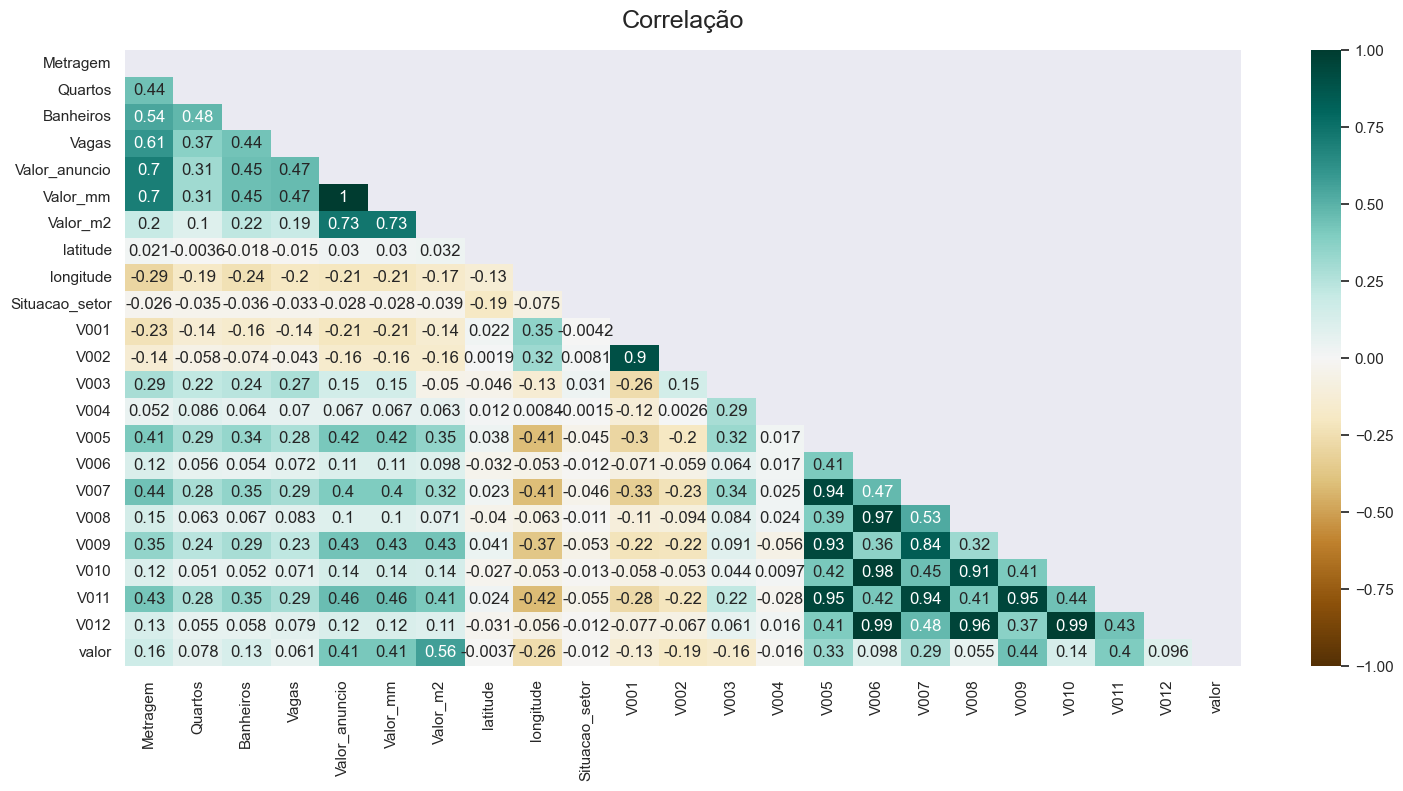

In [153]:
plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
mask = np.triu(np.ones_like(dados_vendas_censo_valorr_B.corr(), dtype=bool))
heatmap = sns.heatmap(dados_vendas_censo_valorr_B.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação', fontdict={'fontsize':18}, pad=16);

In [154]:
X = dados_vendas_censo_valorr_B[['Metragem', 'Quartos', 'Banheiros','latitude','longitude','Situacao_setor', 
                        'Vagas','V001','V007', 'V009','V011','valor']]
Y = dados_vendas_censo_valorr_B["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)
lr.fit(X_train, Y_train)
Y_predict_test = lr.predict(X_test)
Y_predict_train = lr.predict(X_train)
mae_test = mean_absolute_error(Y_test, Y_predict_test)
r2_test = r2_score(Y_test, Y_predict_test)
mae_train = mean_absolute_error(Y_train, Y_predict_train)
r2_train = r2_score(Y_train, Y_predict_train)

In [155]:
mae_test

1499959.5520376167

In [156]:
r2_test

0.5688514503084361

In [157]:
Y_predict_train

array([1677044.58392948,  305028.81881464, 4257951.5610671 , ...,
       1957499.43622202, 5192569.67882556, 1510267.76168513])

In [158]:
Y_train

5018   1198000.00
3544   1200000.00
783    5600000.00
2774    900000.00
808    4900000.00
          ...    
2543   1250000.00
5103   3800000.00
2189   1860000.00
3410   1387000.00
2760   1219000.00
Name: Valor_anuncio, Length: 1386, dtype: float64

##### Acima os resultados da regressão possuindo o valor real do m2 utilizando regressão linear

In [159]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)

X = dados_vendas_censo_valorr_B[['Metragem', 'Quartos', 'Banheiros','latitude','longitude','Situacao_setor', 
                        'Vagas','V001','V007', 'V009','valor']]
Y = dados_vendas_censo_valorr_B["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)

reg.fit(X_train, Y_train)

Y_predict_test = reg.predict(X_test)
Y_predict_train = reg.predict(X_train)
mae_test = mean_absolute_error(Y_test, Y_predict_test)
r2_test = r2_score(Y_test, Y_predict_test)
mae_train = mean_absolute_error(Y_train, Y_predict_train)
r2_train = r2_score(Y_train, Y_predict_train)

In [160]:
mae_test

1508033.554419292

In [161]:
r2_test

0.5662621345515781

In [162]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)

X = dados_vendas_censo[['Metragem', 'Quartos', 'Banheiros','latitude','longitude','Situacao_setor', 
                        'Vagas','V001','V007', 'V009']]
Y = dados_vendas_censo["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)

reg.fit(X_train, Y_train)

Y_predict_test = reg.predict(X_test)
Y_predict_train = reg.predict(X_train)
mae_test = mean_absolute_error(Y_test, Y_predict_test)
r2_test = r2_score(Y_test, Y_predict_test)
mae_train = mean_absolute_error(Y_train, Y_predict_train)
r2_train = r2_score(Y_train, Y_predict_train)

In [163]:
mae_test

1343095.3836693666

In [164]:
r2_test

0.38328953223208684

#### Ridge regression acima

In [165]:
from sklearn import svm

X = dados_vendas_censo[['Metragem', 'Quartos', 'Banheiros','latitude','longitude','Situacao_setor', 
                        'Vagas','V001','V007', 'V009']]
Y = dados_vendas_censo["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)

regr = svm.SVR()
regr.fit(X_train, Y_train)

Y_predict_test = regr.predict(X_test)
Y_predict_train = regr.predict(X_train)
mae_test = mean_absolute_error(Y_test, Y_predict_test)
r2_test = r2_score(Y_test, Y_predict_test)
mae_train = mean_absolute_error(Y_train, Y_predict_train)
r2_train = r2_score(Y_train, Y_predict_train)

In [166]:
mae_test

1715067.545361608

In [167]:
r2_test

-0.08526168355906338

In [168]:
from sklearn import svm

X = dados_vendas_censo_valorr_B[['Metragem', 'Quartos', 'Banheiros','latitude','longitude','Situacao_setor', 
                        'Vagas','V001','V007', 'V009','valor']]
Y = dados_vendas_censo_valorr_B["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)

regr = svm.SVR()
regr.fit(X_train, Y_train)

Y_predict_test = regr.predict(X_test)
Y_predict_train = regr.predict(X_train)
mae_test = mean_absolute_error(Y_test, Y_predict_test)
r2_test = r2_score(Y_test, Y_predict_test)
mae_train = mean_absolute_error(Y_train, Y_predict_train)
r2_train = r2_score(Y_train, Y_predict_train)

In [169]:
mae_test

2130075.704546847

In [170]:
r2_test

-0.06931338619035365

In [171]:
dados_vendas_censo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5303 entries, 0 to 5604
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rua             5303 non-null   object 
 1   Bairro          5303 non-null   object 
 2   Cidade          5303 non-null   object 
 3   Metragem        5303 non-null   int64  
 4   Quartos         5303 non-null   int64  
 5   Banheiros       5303 non-null   int64  
 6   Vagas           5303 non-null   int64  
 7   Valor_anuncio   5303 non-null   float64
 8   Valor_mm        5303 non-null   float64
 9   Valor_m2        5303 non-null   float64
 10  latitude        5303 non-null   float64
 11  longitude       5303 non-null   float64
 12  Situacao_setor  5303 non-null   float64
 13  V001            5303 non-null   float64
 14  V002            5303 non-null   float64
 15  V003            5303 non-null   float64
 16  V004            5303 non-null   float64
 17  V005            5303 non-null   f

In [172]:
dados_vendas_censo_no_out = dados_vendas_censo.query('Metragem <= 873 & Quartos <=5.5 & Banheiros <= 9.5 & Vagas <= 9.5 & Valor_anuncio <= 7415000.00 & Valor_m2 <=16509.45')
dados_vendas_censo_no_out

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,3.70,7459.68,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,0.38,3040.00,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,0.54,5400.00,...,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.00,1.98,4500.00,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
5,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,850000.00,0.85,5862.07,...,2.95,2.18,1580.84,4440789.58,1897.01,4730743.23,1284.45,2578384.56,1743.39,2699812.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5599,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,960000.00,0.96,6114.65,...,2.17,1.27,5054.58,33245189.73,5231.93,33485189.78,3649.06,26562232.53,4551.66,29032823.35
5600,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.00,1.50,5617.98,...,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
5601,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.00,0.67,7000.00,...,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
5603,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.00,1.05,5121.95,...,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


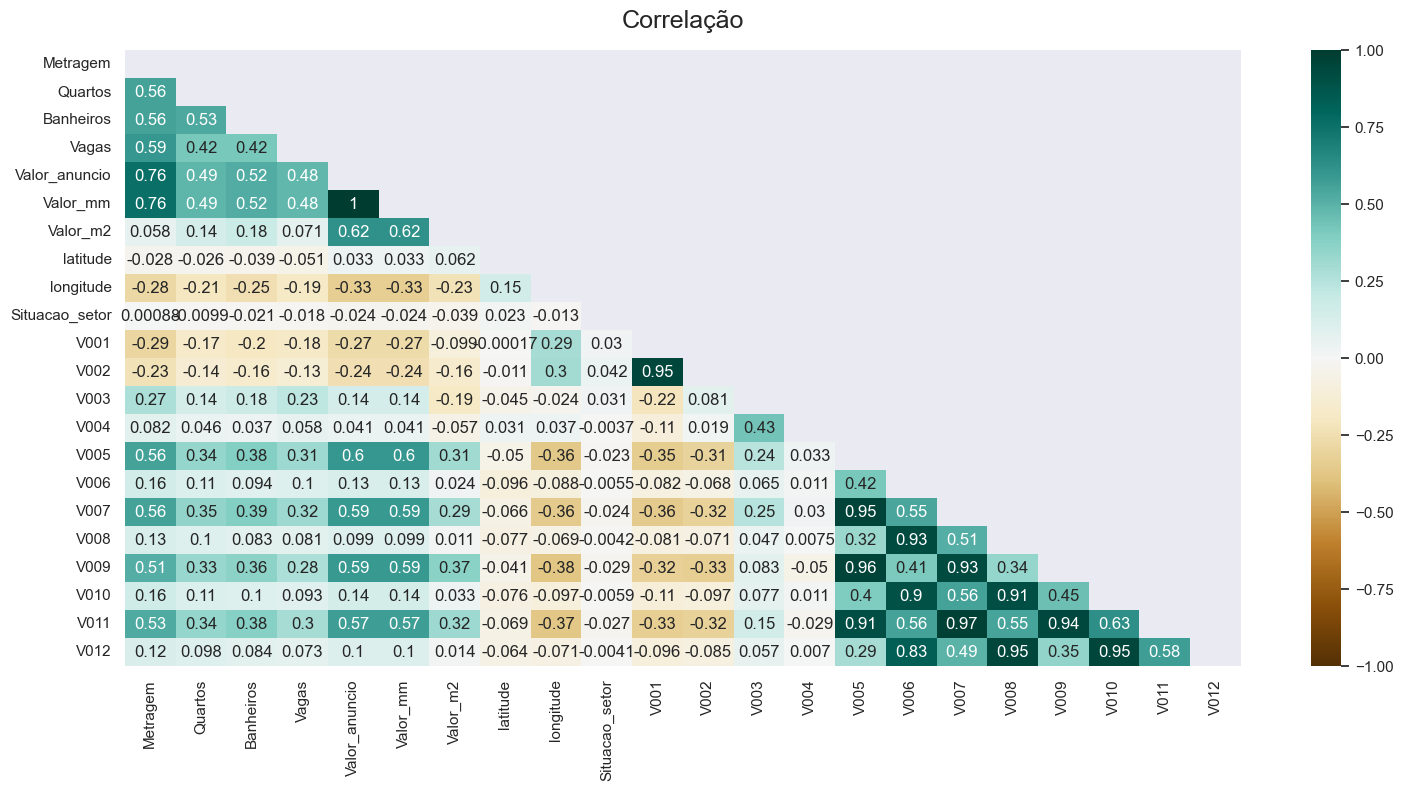

In [173]:
plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
mask = np.triu(np.ones_like(dados_vendas_censo_no_out.corr(), dtype=bool))
heatmap = sns.heatmap(dados_vendas_censo_no_out.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação', fontdict={'fontsize':18}, pad=16);

In [174]:
X = dados_vendas_censo_no_out[['Metragem', 'Quartos', 'Banheiros','latitude','longitude','Situacao_setor', 
                        'Vagas','V005','V007', 'V009','V011']]
Y = dados_vendas_censo_no_out["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)
lr.fit(X_train, Y_train)
Y_predict_test = lr.predict(X_test)
Y_predict_train = lr.predict(X_train)
mae_test = mean_absolute_error(Y_test, Y_predict_test)
r2_test = r2_score(Y_test, Y_predict_test)
mae_train = mean_absolute_error(Y_train, Y_predict_train)
r2_train = r2_score(Y_train, Y_predict_train)


In [175]:
r2_test

0.6641873109039697

In [176]:
mae_test

560164.5899903438

In [177]:
X = dados_vendas_censo_no_out[['Metragem', 'Quartos', 'Banheiros','latitude','longitude','Situacao_setor', 
                        'Vagas']]
Y = dados_vendas_censo_no_out["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)
lr.fit(X_train, Y_train)
Y_predict_test = lr.predict(X_test)
Y_predict_train = lr.predict(X_train)
mae_test = mean_absolute_error(Y_test, Y_predict_test)
r2_test = r2_score(Y_test, Y_predict_test)
mae_train = mean_absolute_error(Y_train, Y_predict_train)
r2_train = r2_score(Y_train, Y_predict_train)


In [178]:
r2_test

0.6185770088822945

In [179]:
mae_test

616322.6517255552

In [180]:
import numpy as np

input_data = np.array([92, 2, 2, -23.583682379225486, -46.628311394546195, 1, 0])
reshaped_input = input_data.reshape(1, -1)  # Reshape to a 2D array with one row

y_predict_test = lr.predict(reshaped_input)
y_predict_test

array([419527.00803654])

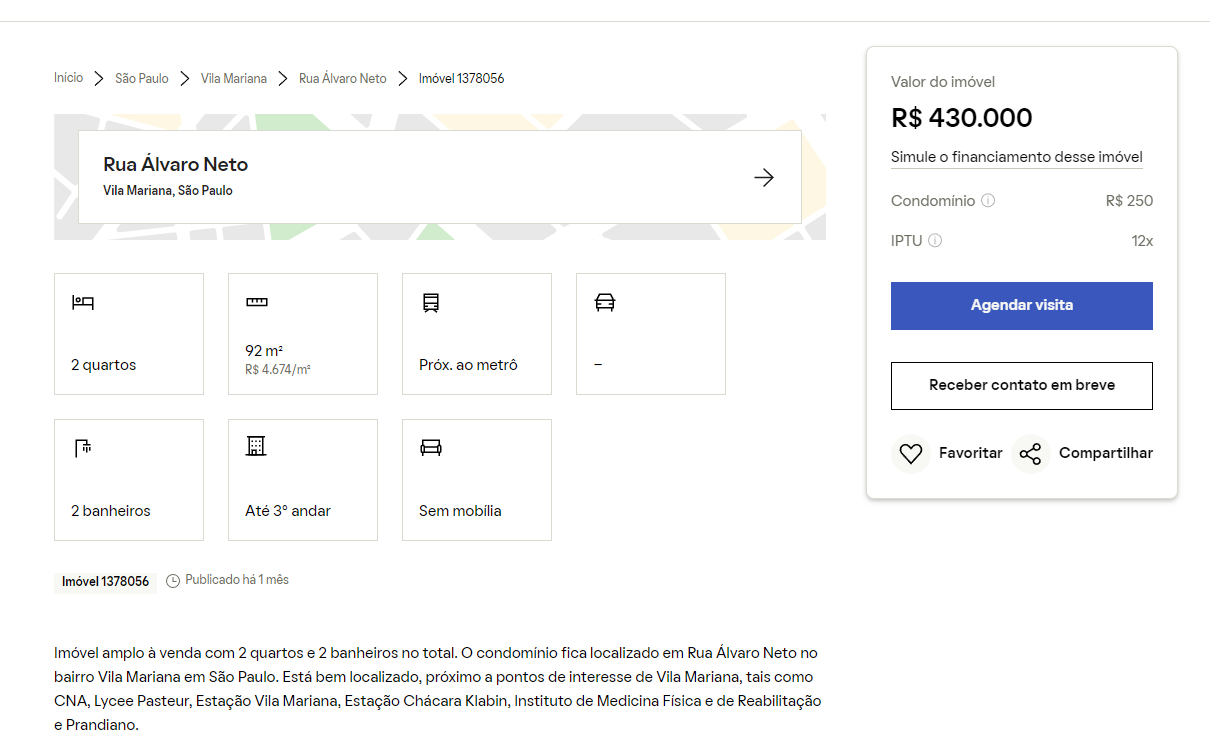

In [181]:
dados_vendas_censo_valorr_B_no = dados_vendas_censo_valorr_B.query('Metragem <= 873 & Quartos <=5.5 & Banheiros <= 9.5 & Vagas <= 9.5 & Valor_anuncio <= 7415000.00 & Valor_m2 <=16509.45')
dados_vendas_censo_valorr_B

X = dados_vendas_censo_valorr_B_no[['Metragem', 'Quartos', 'Banheiros','latitude','longitude','Situacao_setor', 
                        'Vagas','V005','V007', 'V009','valor']]
Y = dados_vendas_censo_valorr_B_no["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)
lr.fit(X_train, Y_train)
Y_predict_test = lr.predict(X_test)
Y_predict_train = lr.predict(X_train)
mae_test = mean_absolute_error(Y_test, Y_predict_test)
r2_test = r2_score(Y_test, Y_predict_test)
mae_train = mean_absolute_error(Y_train, Y_predict_train)
r2_train = r2_score(Y_train, Y_predict_train)

In [182]:
r2_test

0.6788926338302668

In [183]:
mae_test

592874.3253111494